In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [147]:
train_data=pd.read_excel(r"/Users/rinki/Desktop/train_data.xlsx")
train_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [148]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [149]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [178]:
sns.heatmap(train_data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

In [151]:
train_data.drop(['Alley','PoolQC','FireplaceQu','LotFrontage','MiscVal'],axis=1,inplace=True)

In [179]:
train_data.dropna(inplace=True)

In [180]:
train_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
LotShape         0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
Foundation       0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MoSold           0
YrSold           0
SaleType    

In [9]:
sns.catplot(y="SalePrice",x="YrSold",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

In [10]:
sns.catplot(y="SalePrice",x="SaleType",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

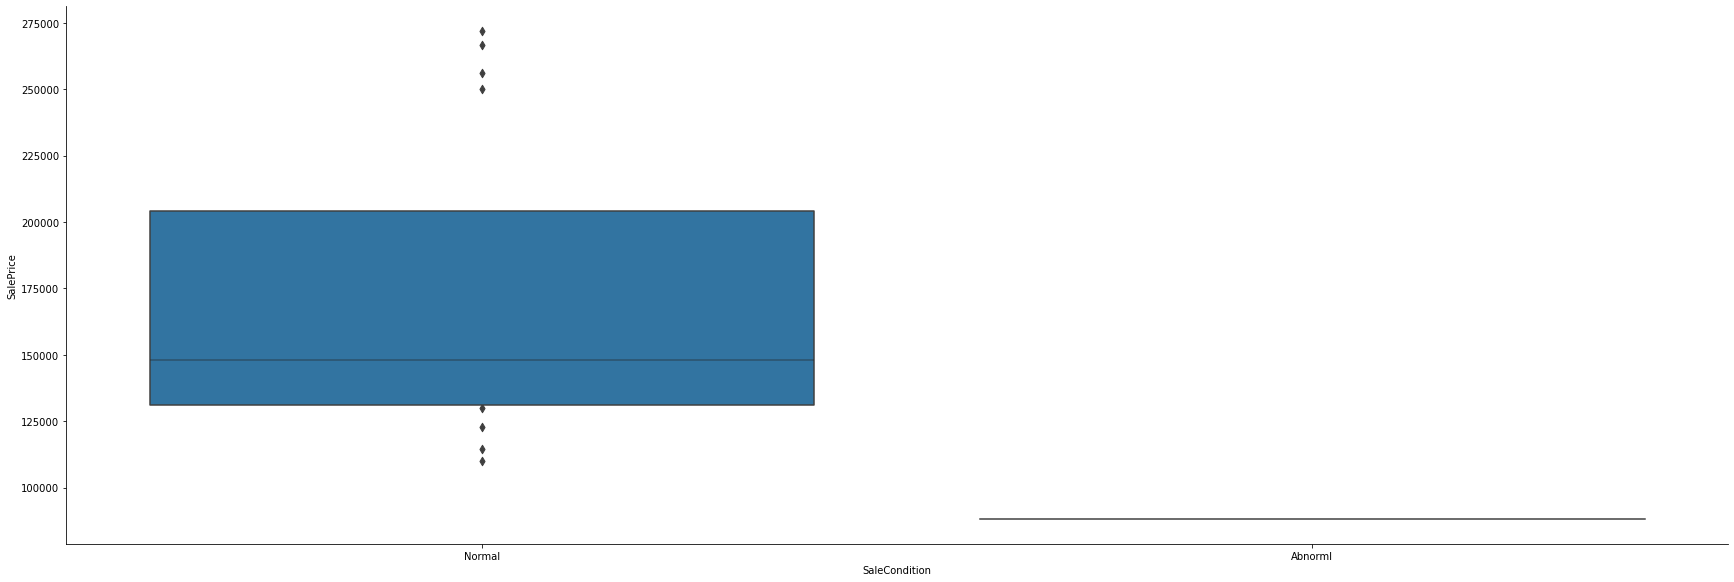

In [11]:
sns.catplot(y="SalePrice",x="SaleCondition",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

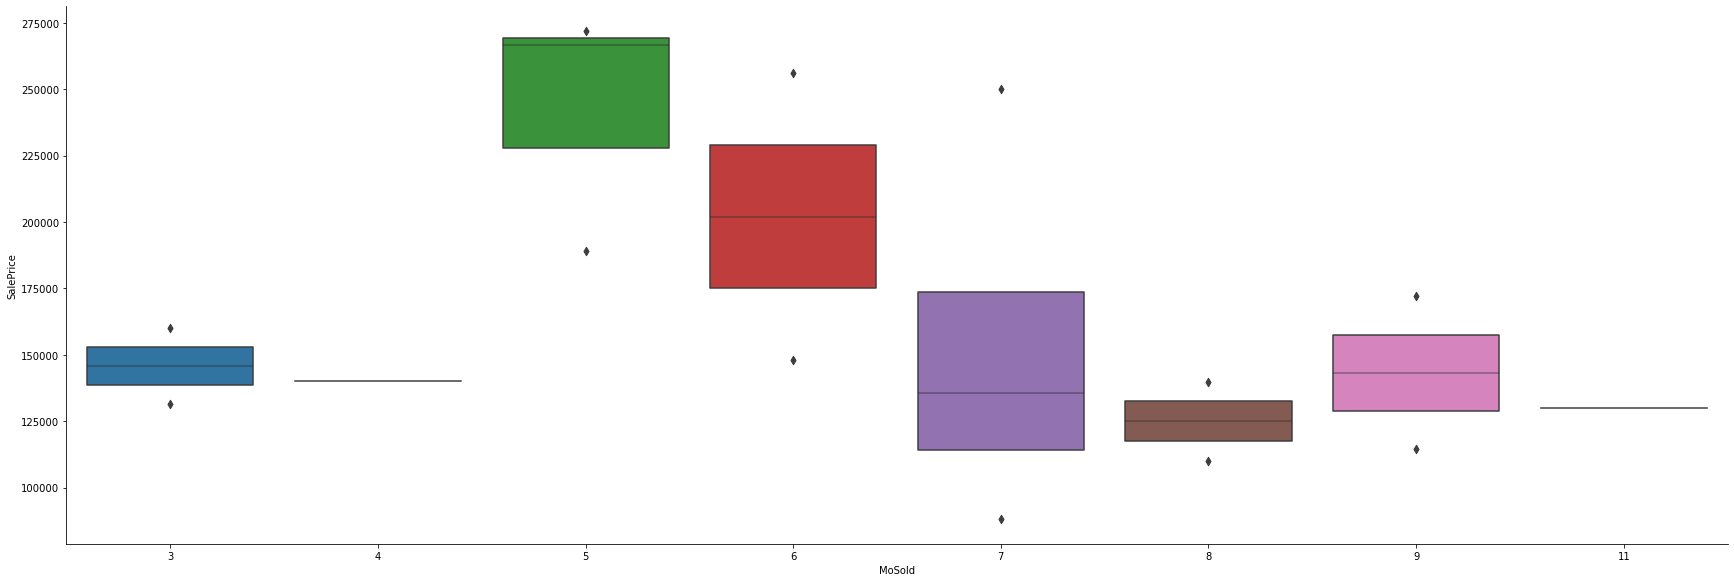

In [12]:
sns.catplot(y="SalePrice",x="MoSold",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

In [14]:
sns.catplot(y="SalePrice",x="MiscFeature",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

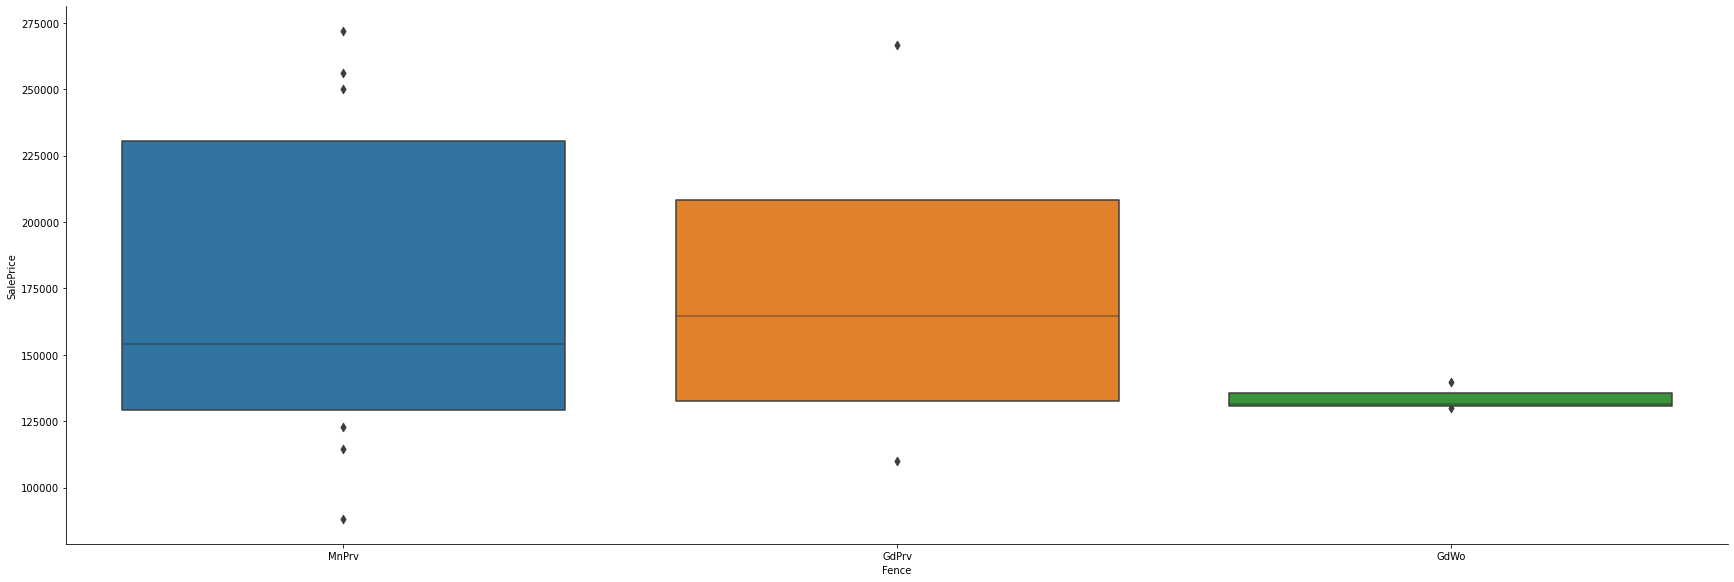

In [15]:
sns.catplot(y="SalePrice",x="Fence",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

In [17]:
sns.catplot(y="SalePrice",x="PoolArea",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

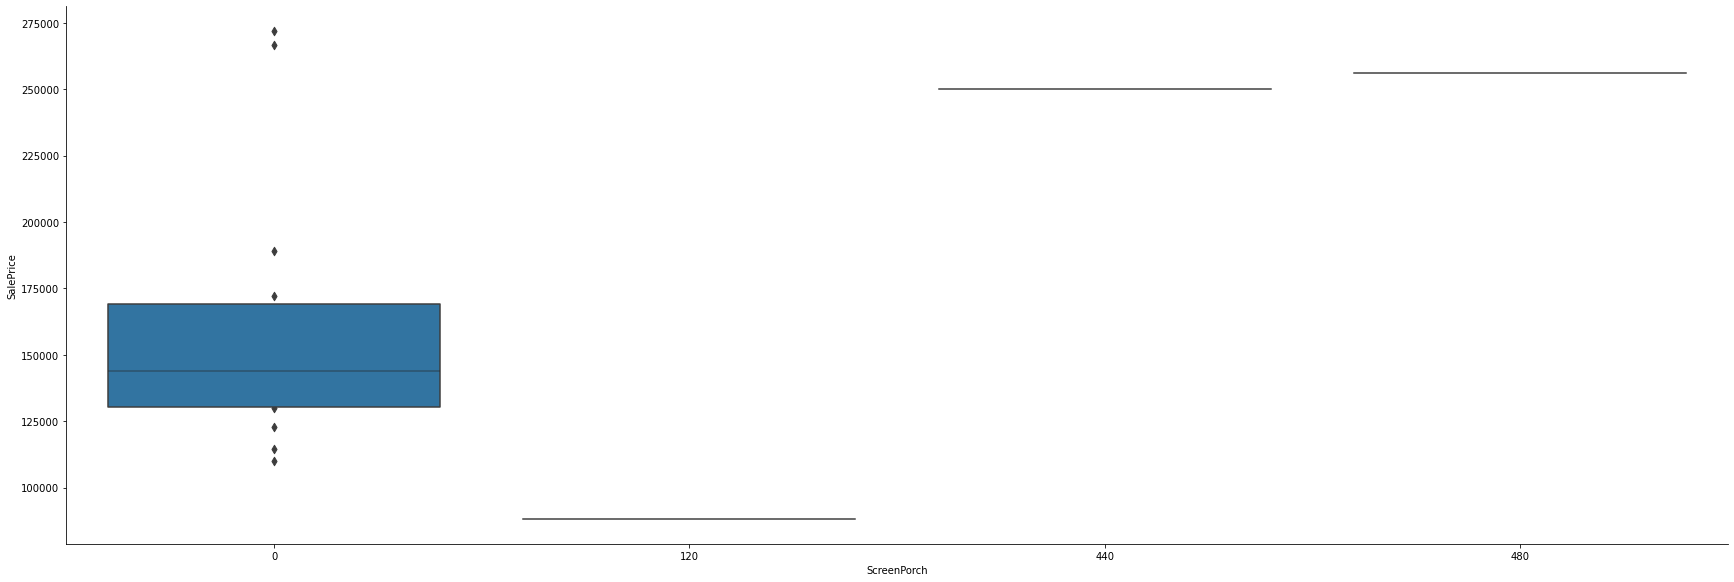

In [18]:
sns.catplot(y="SalePrice",x="ScreenPorch",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

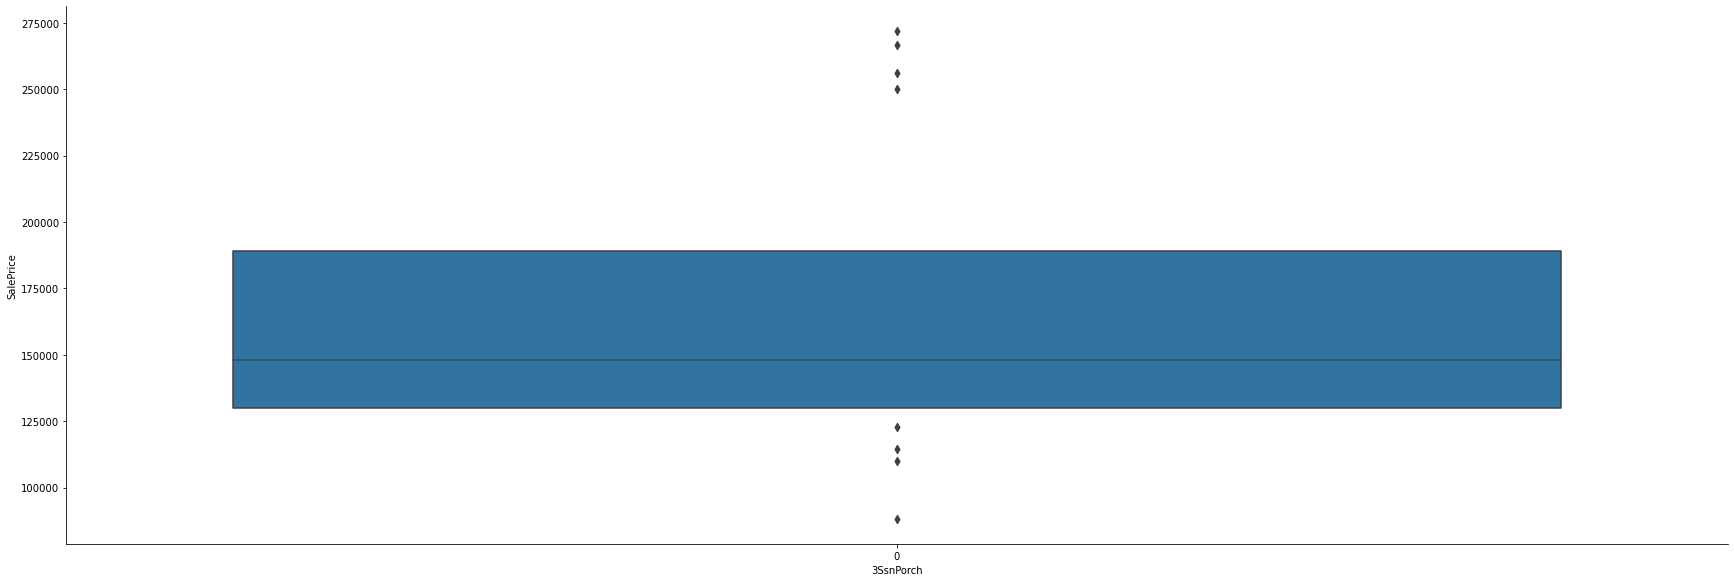

In [19]:
sns.catplot(y="SalePrice",x="3SsnPorch",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

In [20]:
sns.catplot(y="SalePrice",x="EnclosedPorch",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

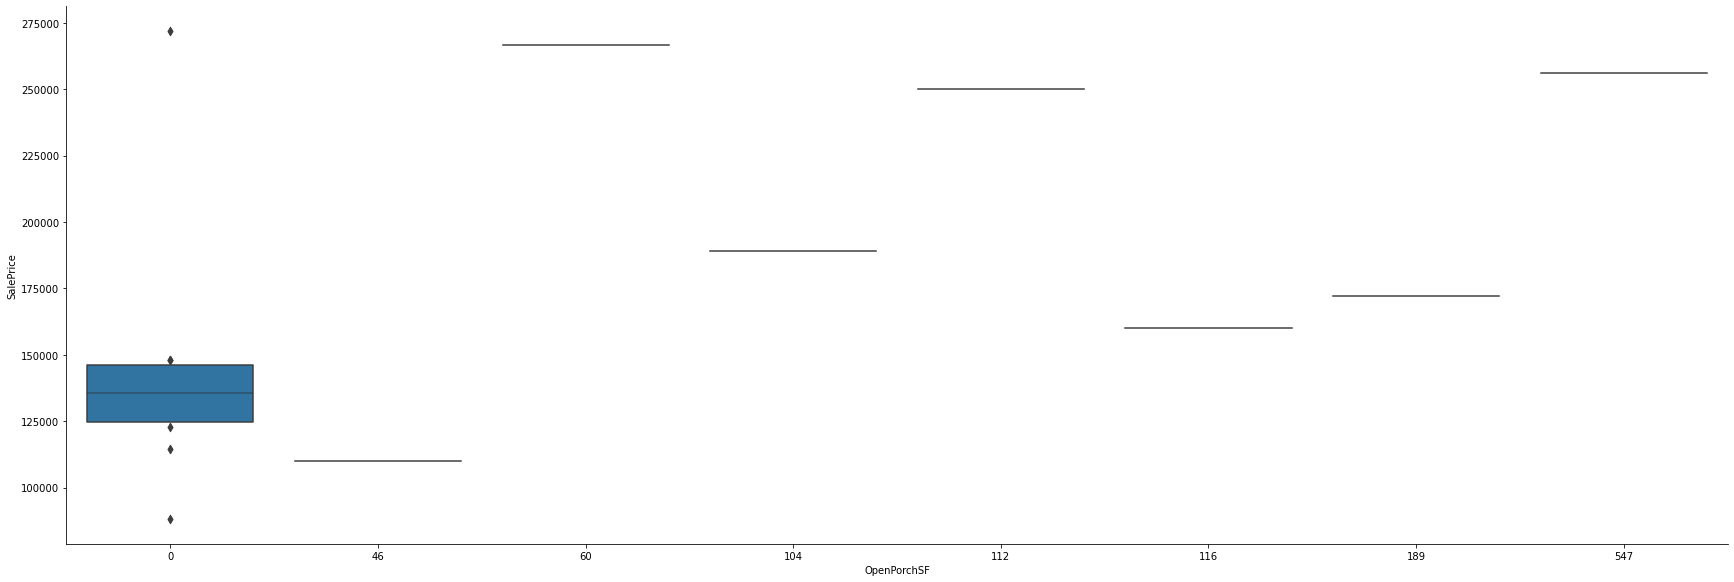

In [21]:
sns.catplot(y="SalePrice",x="OpenPorchSF",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:>

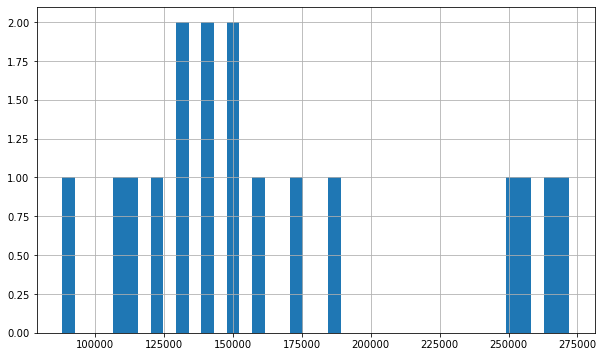

In [22]:
train_data['SalePrice'].hist(bins=40,figsize=(10,6))

<AxesSubplot:>

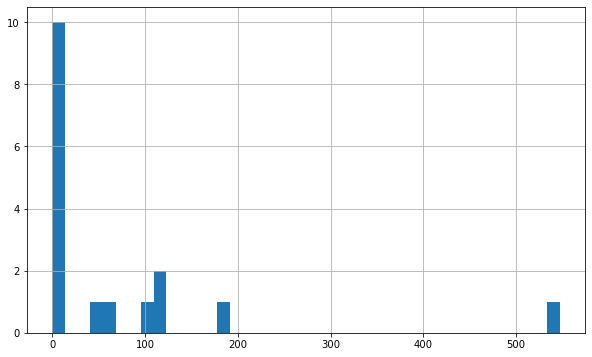

In [23]:
train_data['OpenPorchSF'].hist(bins=40,figsize=(10,6))

<AxesSubplot:>

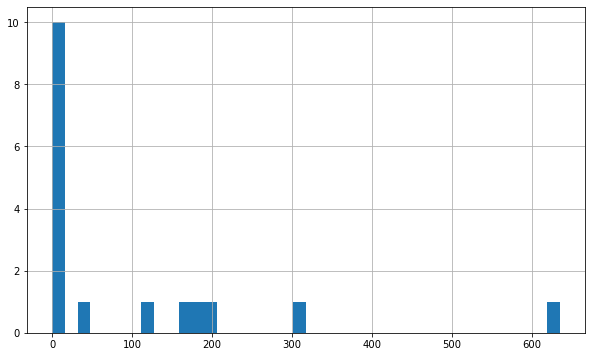

In [24]:
train_data['WoodDeckSF'].hist(bins=40,figsize=(10,6))

<AxesSubplot:xlabel='PavedDrive', ylabel='count'>

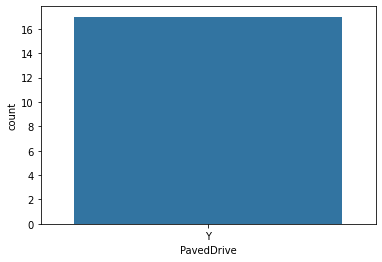

In [25]:
sns.countplot(x='PavedDrive',data=train_data)

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

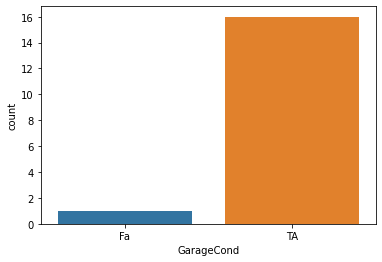

In [26]:
sns.countplot(x='GarageCond',data=train_data)

<AxesSubplot:xlabel='GarageQual', ylabel='count'>

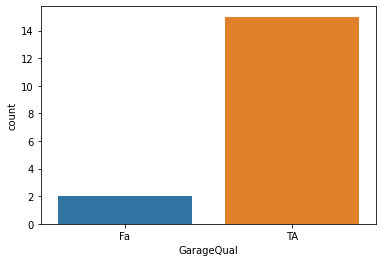

In [27]:
sns.countplot(x='GarageQual',data=train_data)

<AxesSubplot:>

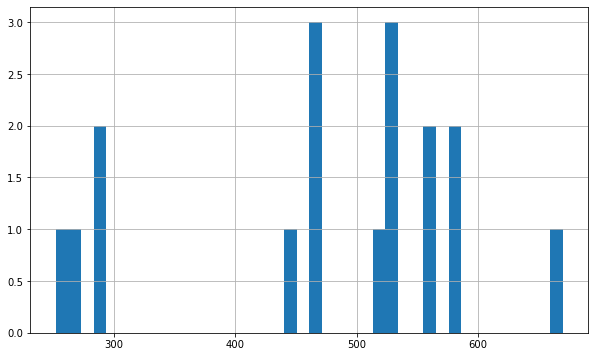

In [28]:
train_data['GarageArea'].hist(bins=40,figsize=(10,6))

<AxesSubplot:xlabel='GarageCars', ylabel='count'>

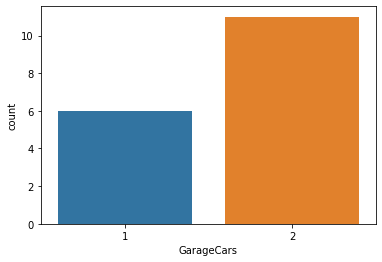

In [29]:
sns.countplot(x='GarageCars',data=train_data)

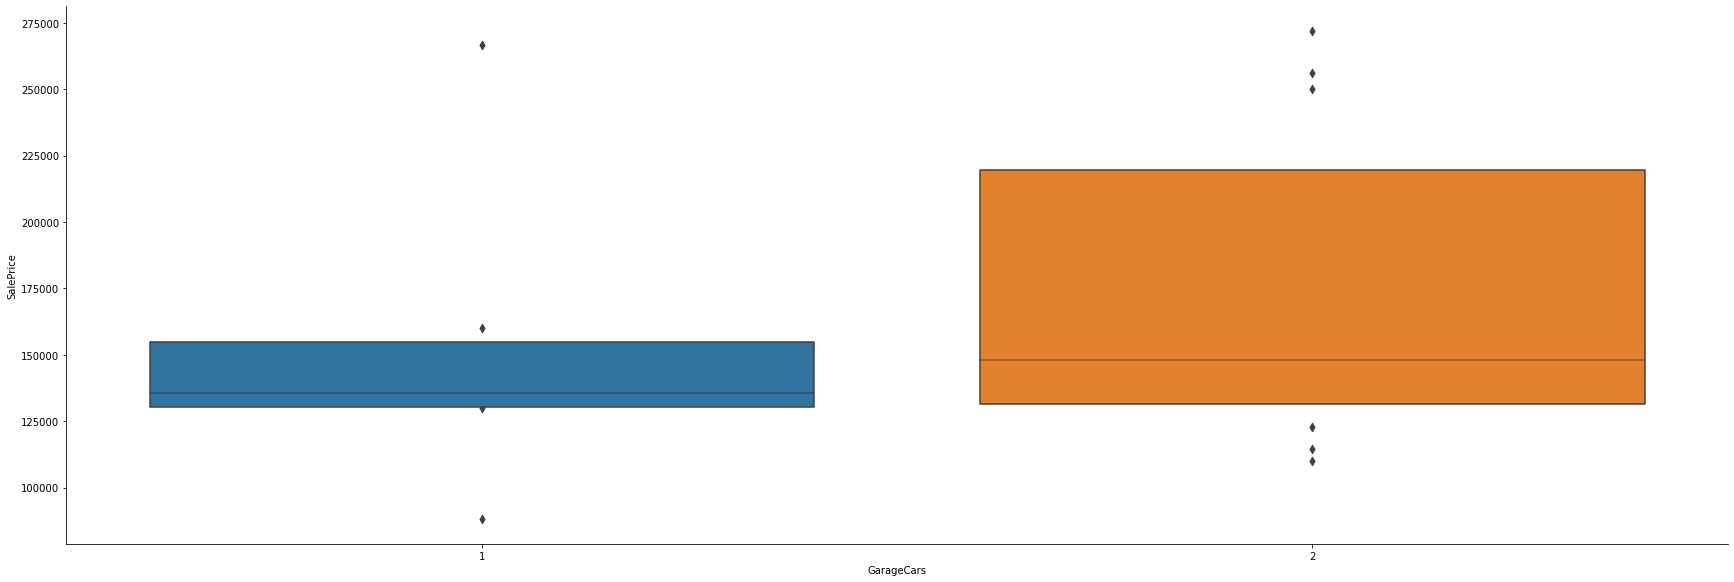

In [30]:
sns.catplot(y="SalePrice",x="GarageCars",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='GarageFinish', ylabel='count'>

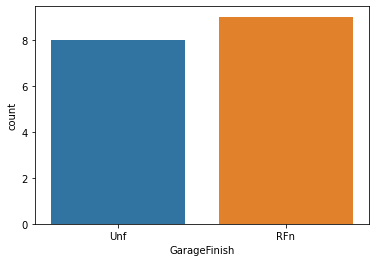

In [31]:
sns.countplot(x='GarageFinish',data=train_data)

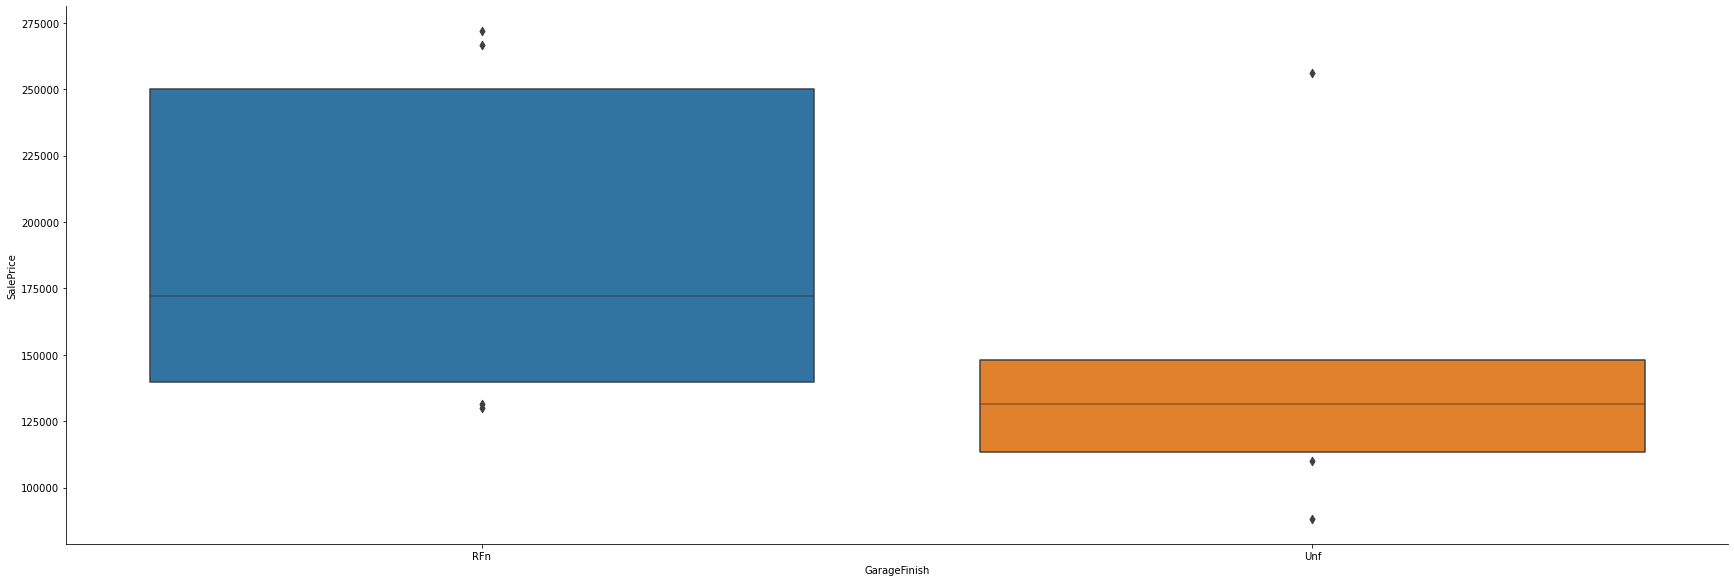

In [32]:
sns.catplot(y="SalePrice",x="GarageFinish",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:>

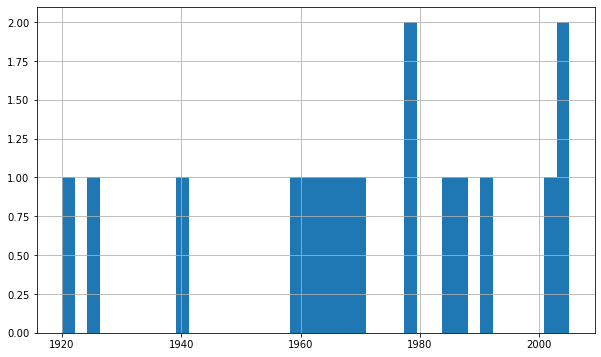

In [33]:
train_data['GarageYrBlt'].hist(bins=40,figsize=(10,6))

<AxesSubplot:xlabel='GarageType', ylabel='count'>

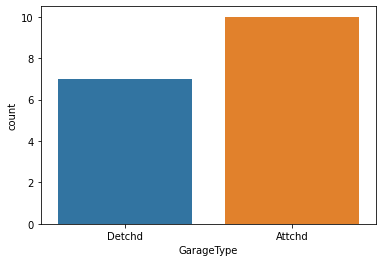

In [34]:
sns.countplot(x='GarageType',data=train_data)

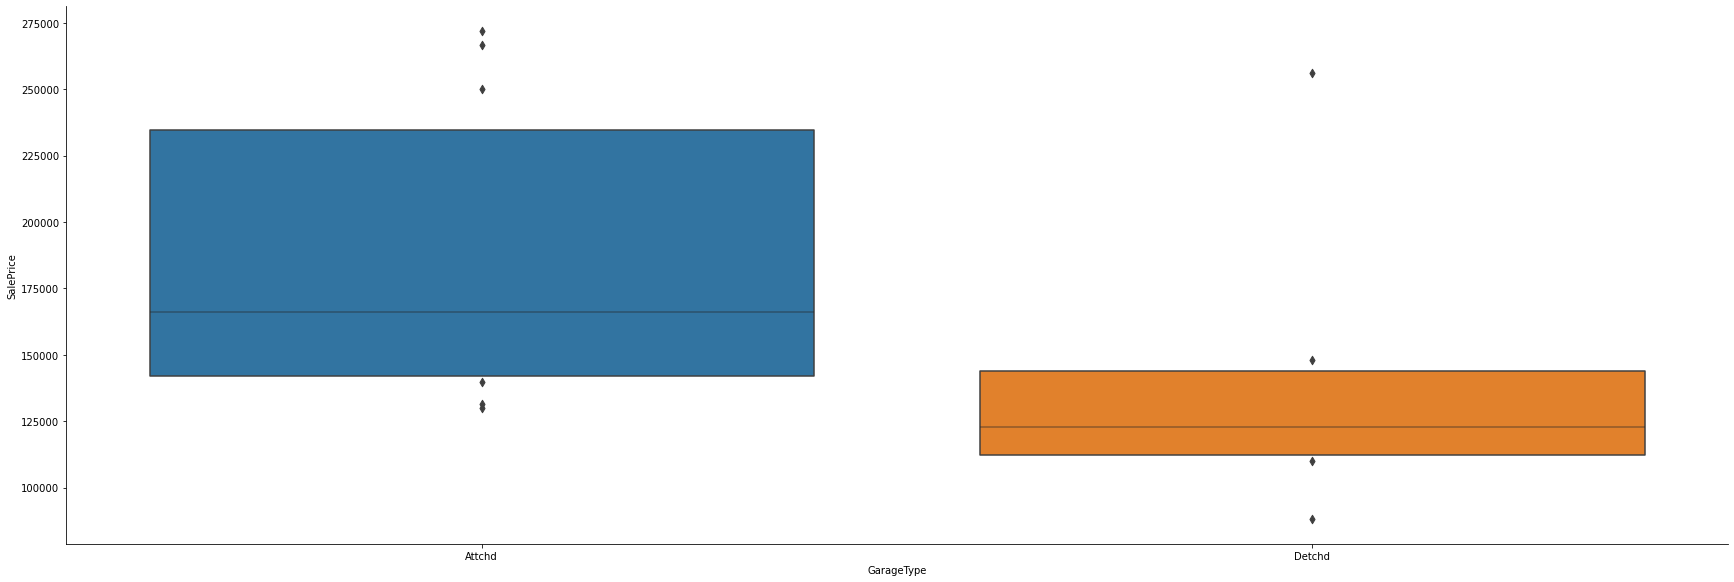

In [35]:
sns.catplot(y="SalePrice",x="GarageType",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='Fireplaces', ylabel='count'>

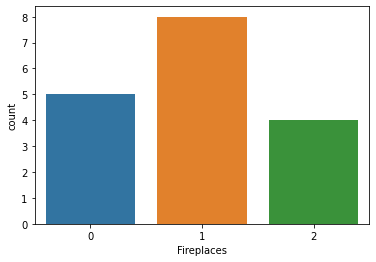

In [38]:
sns.countplot(x='Fireplaces',data=train_data)

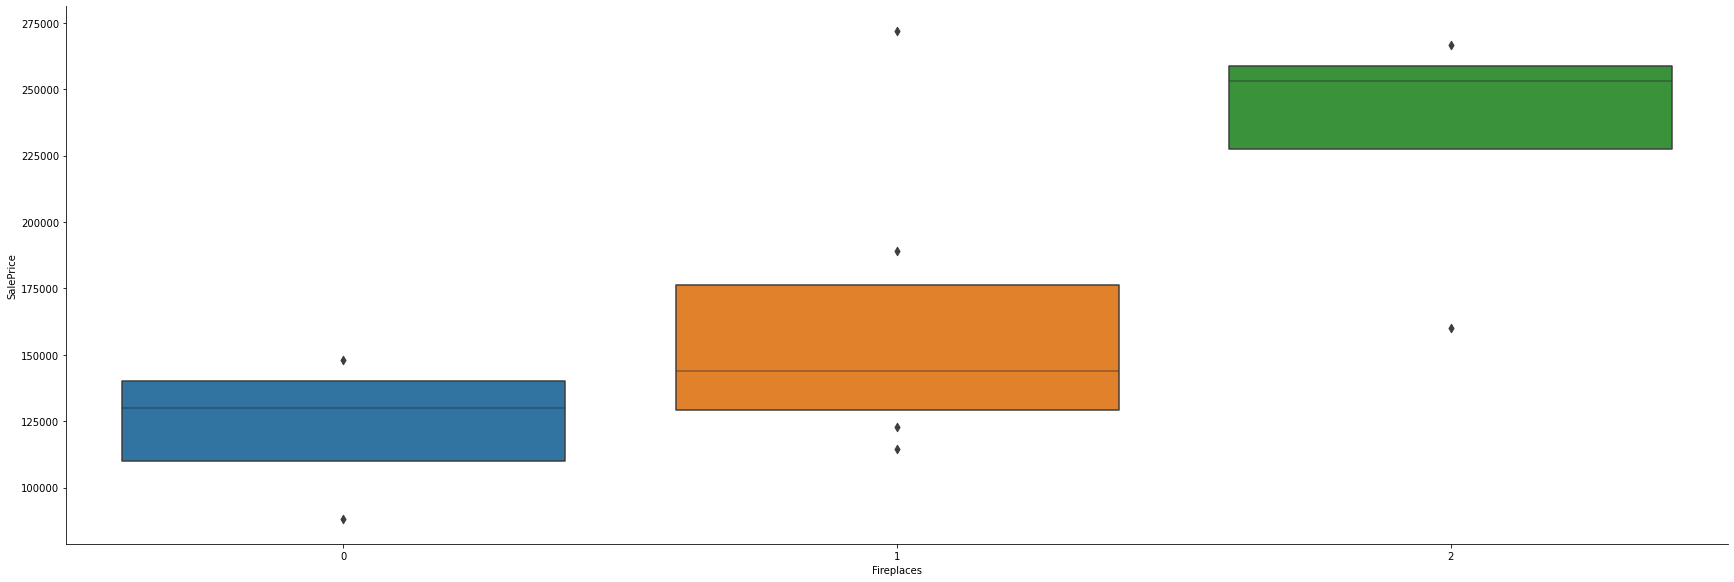

In [39]:
sns.catplot(y="SalePrice",x="Fireplaces",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='Functional', ylabel='count'>

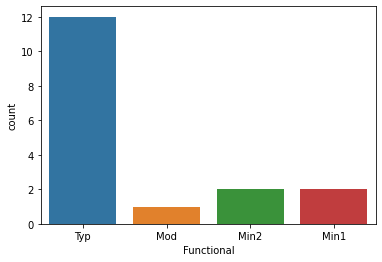

In [40]:
sns.countplot(x='Functional',data=train_data)

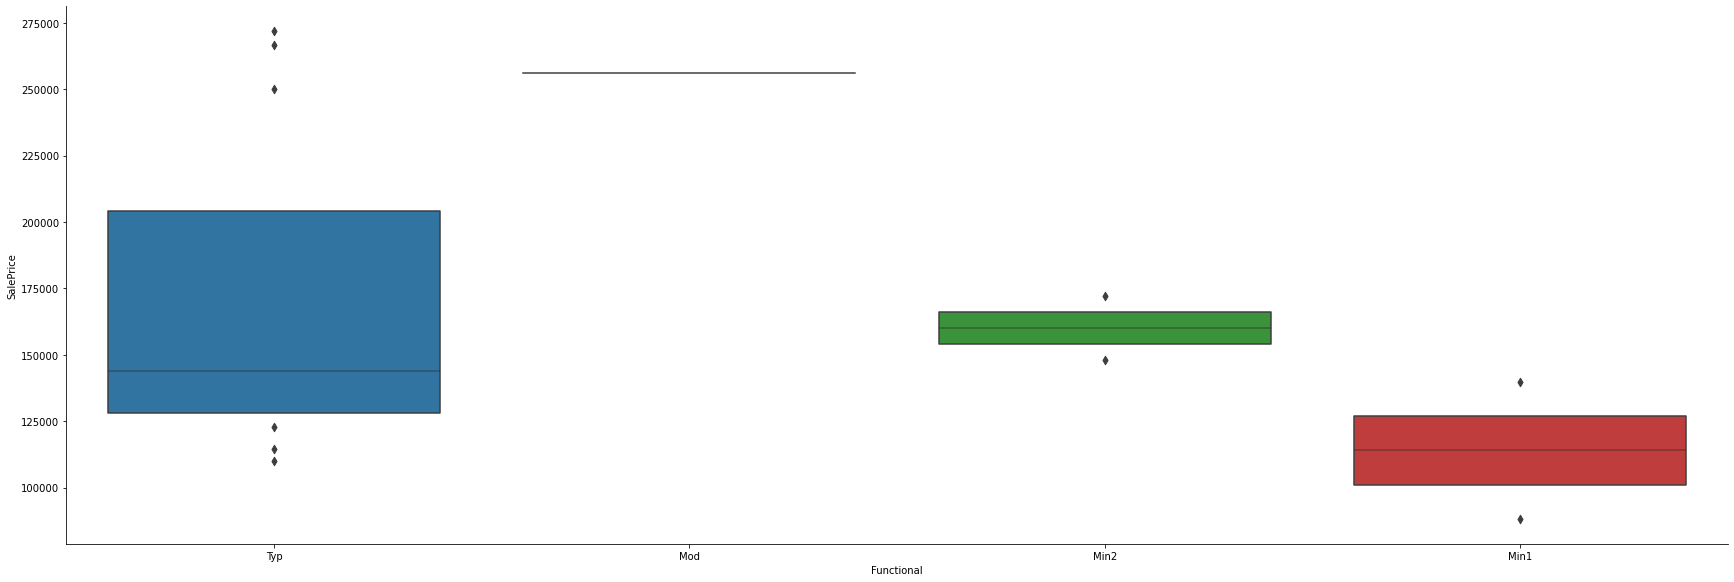

In [41]:
sns.catplot(y="SalePrice",x="Functional",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='count'>

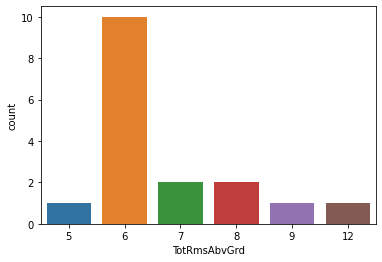

In [44]:
sns.countplot(x='TotRmsAbvGrd',data=train_data)

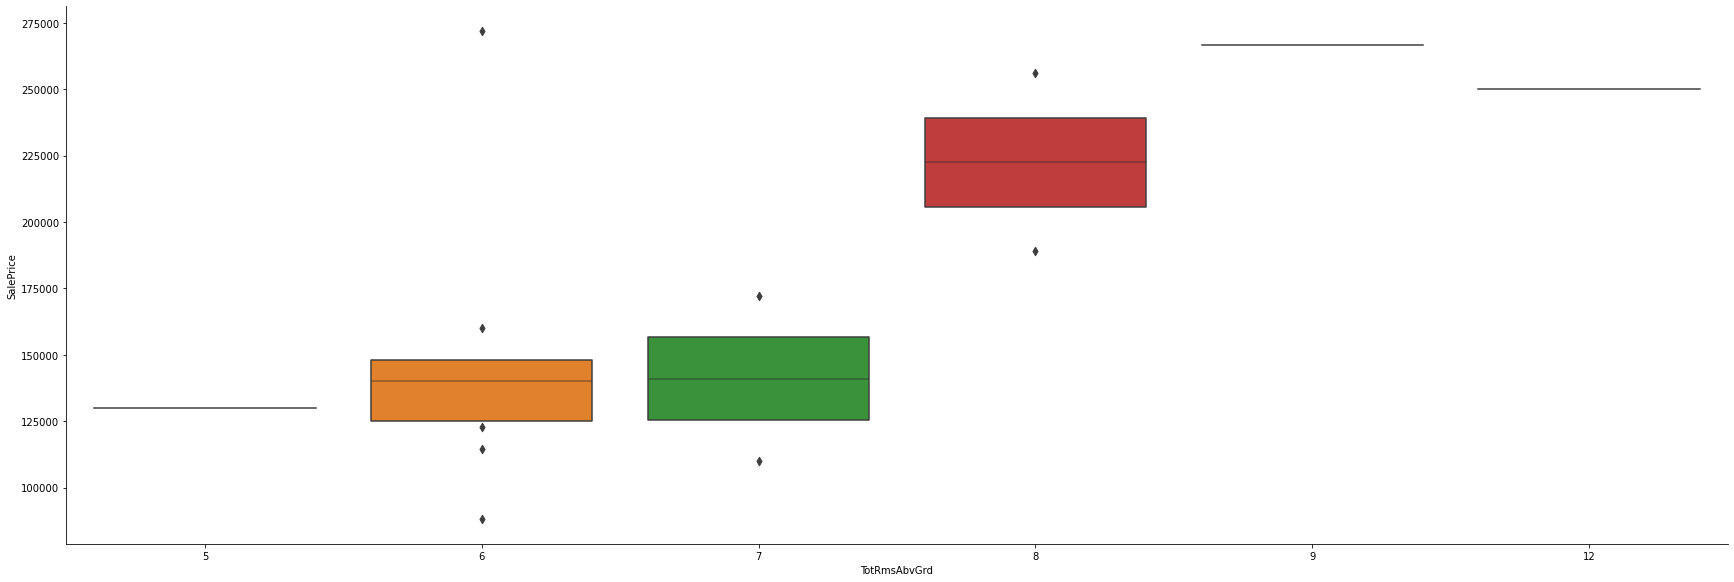

In [45]:
sns.catplot(y="SalePrice",x="TotRmsAbvGrd",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

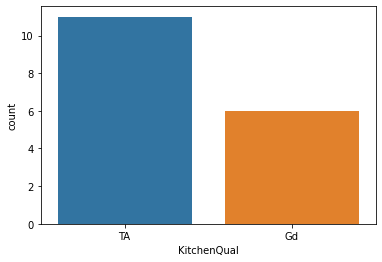

In [46]:
sns.countplot(x='KitchenQual',data=train_data)

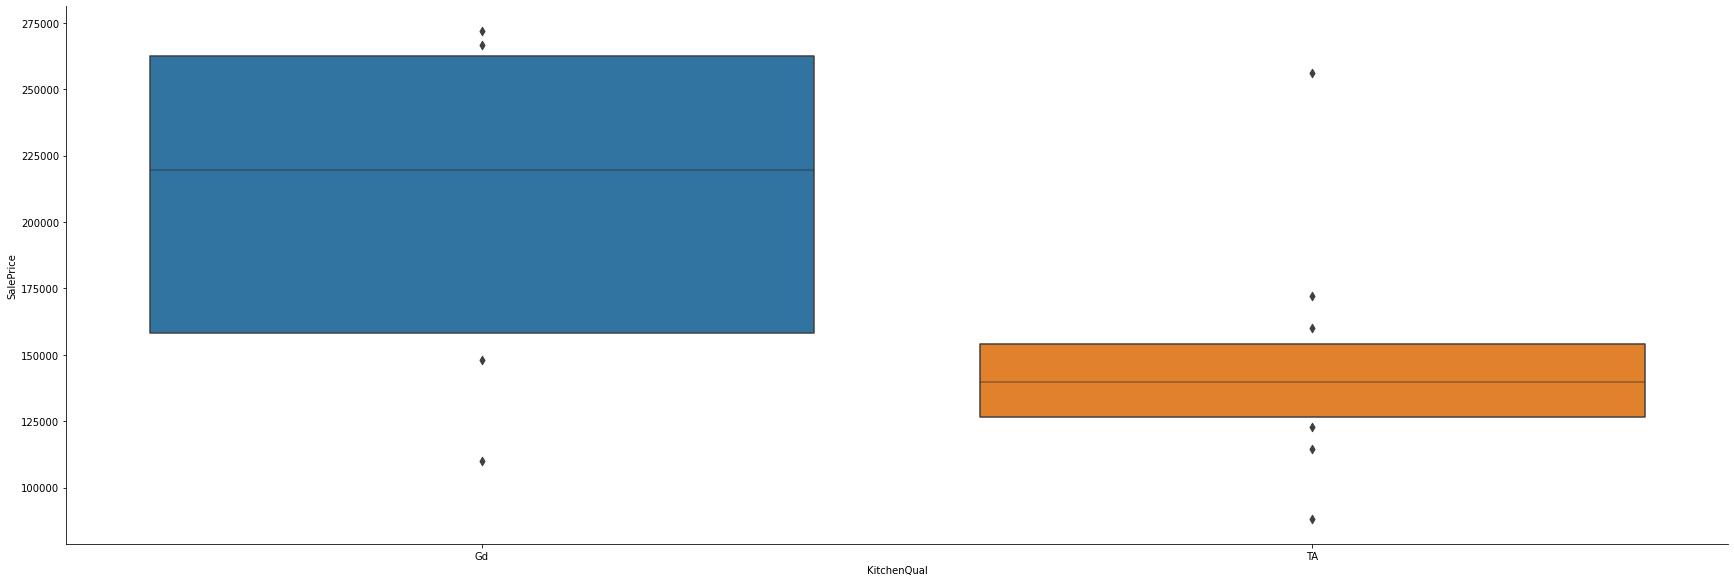

In [51]:
sns.catplot(y="SalePrice",x="KitchenQual",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

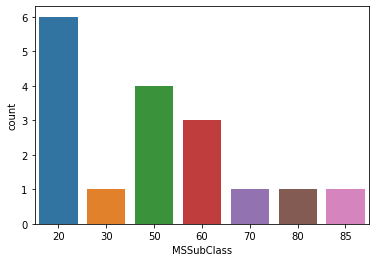

In [47]:
sns.countplot(x='MSSubClass',data=train_data)

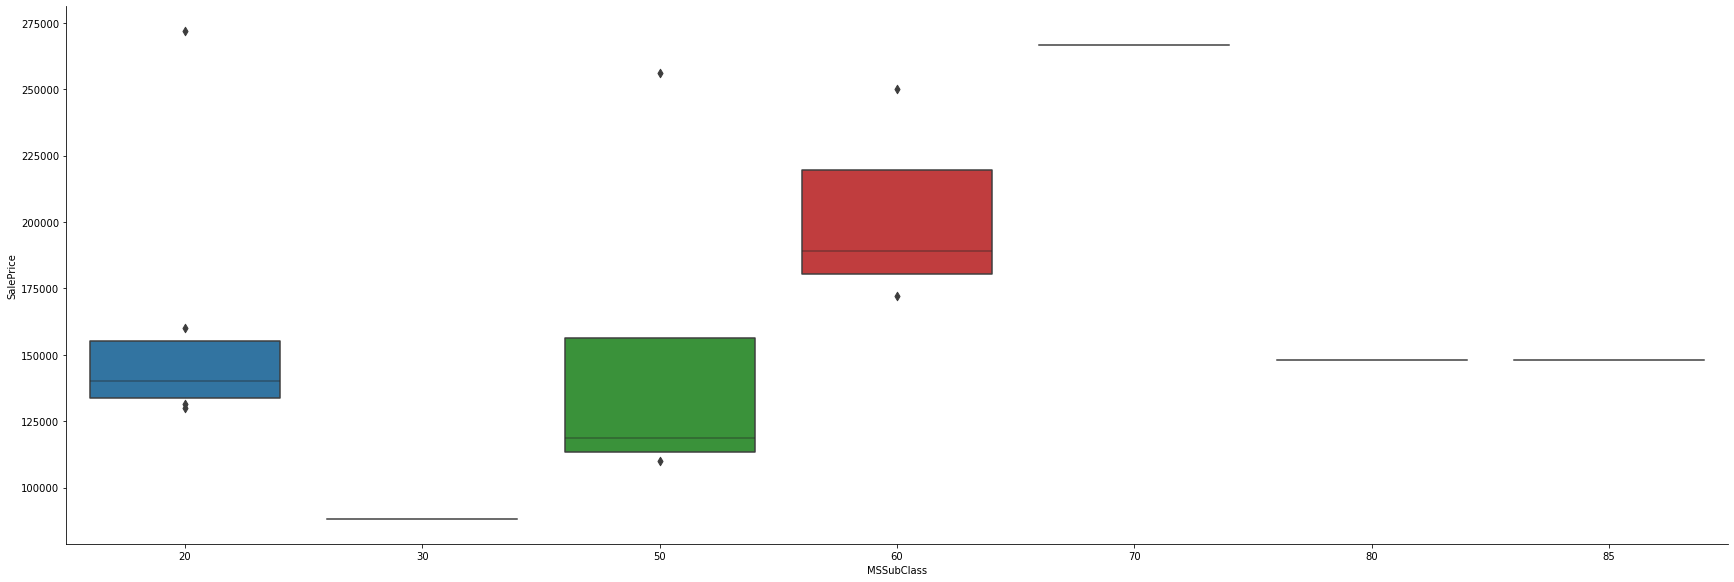

In [53]:
sns.catplot(y="SalePrice",x="MSSubClass",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

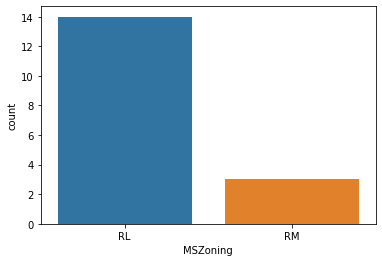

In [48]:
sns.countplot(x='MSZoning',data=train_data)

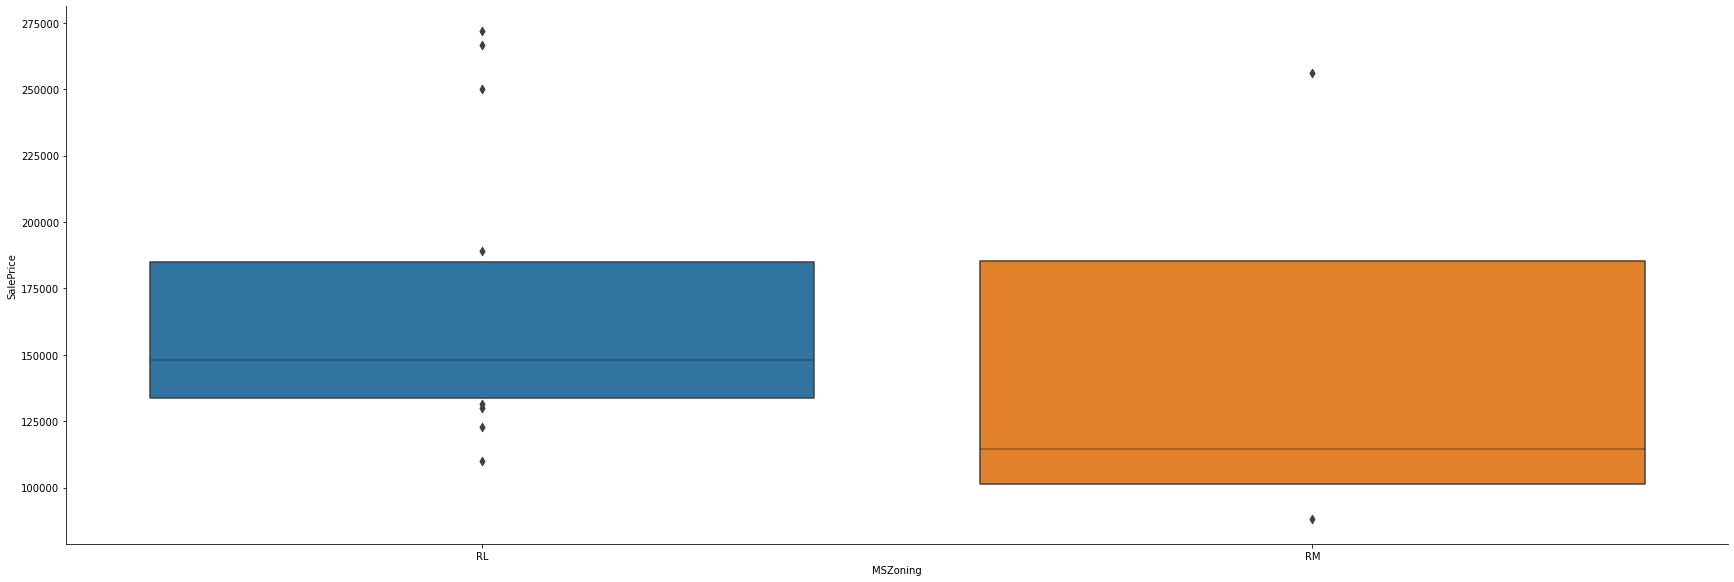

In [52]:
sns.catplot(y="SalePrice",x="MSZoning",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='LotShape', ylabel='count'>

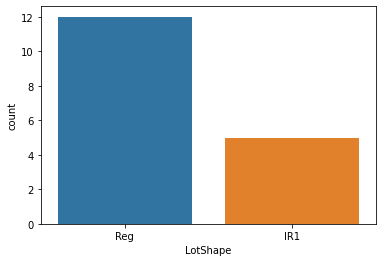

In [55]:
sns.countplot(x='LotShape',data=train_data)

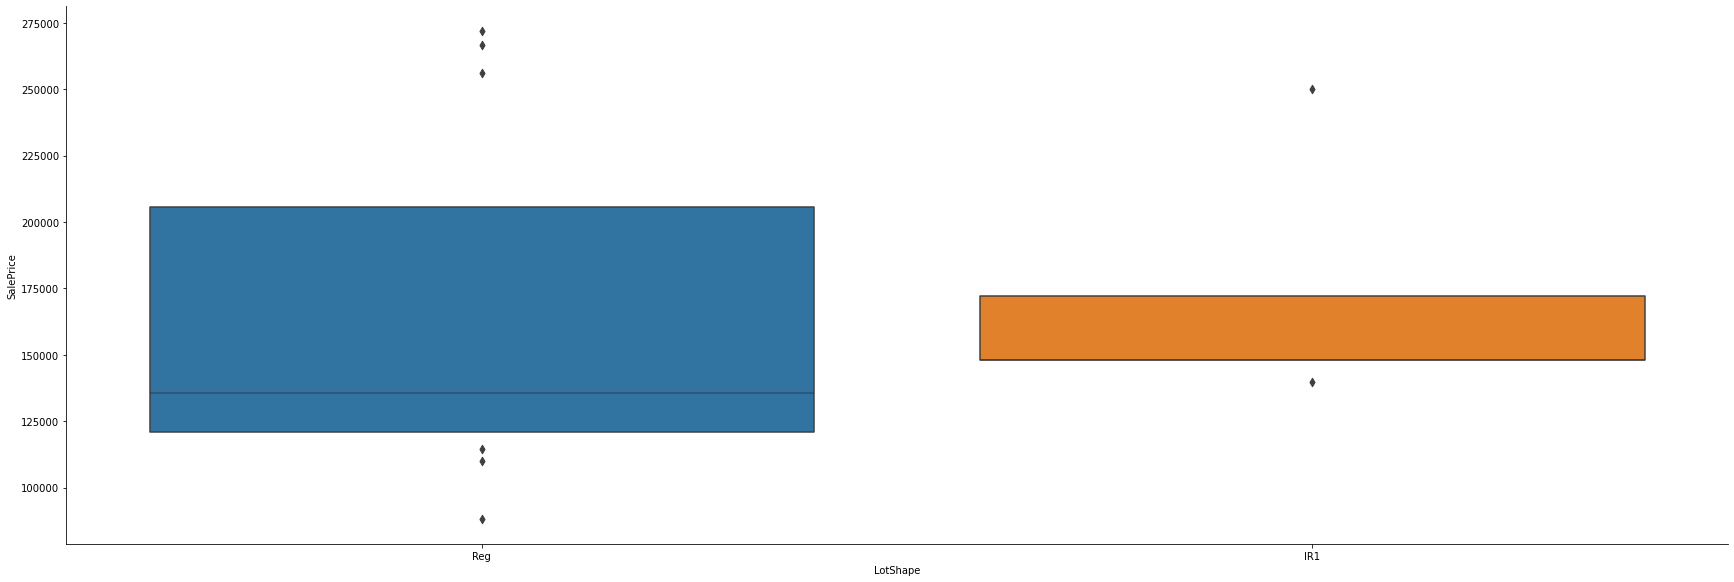

In [56]:
sns.catplot(y="SalePrice",x="LotShape",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

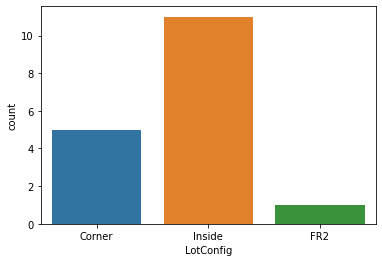

In [59]:
sns.countplot(x='LotConfig',data=train_data)

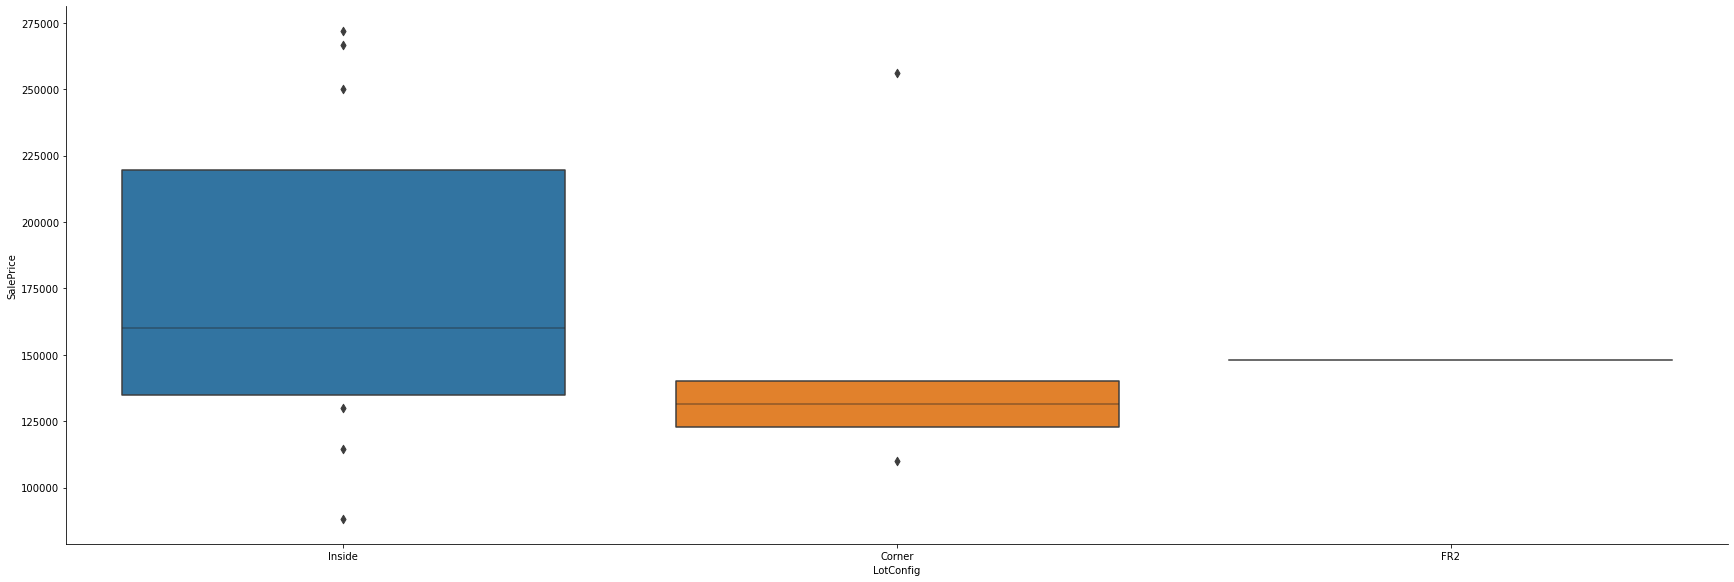

In [60]:
sns.catplot(y="SalePrice",x="LotConfig",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='LandSlope', ylabel='count'>

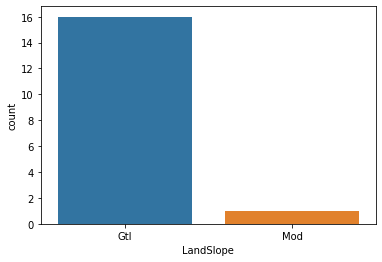

In [61]:
sns.countplot(x='LandSlope',data=train_data)

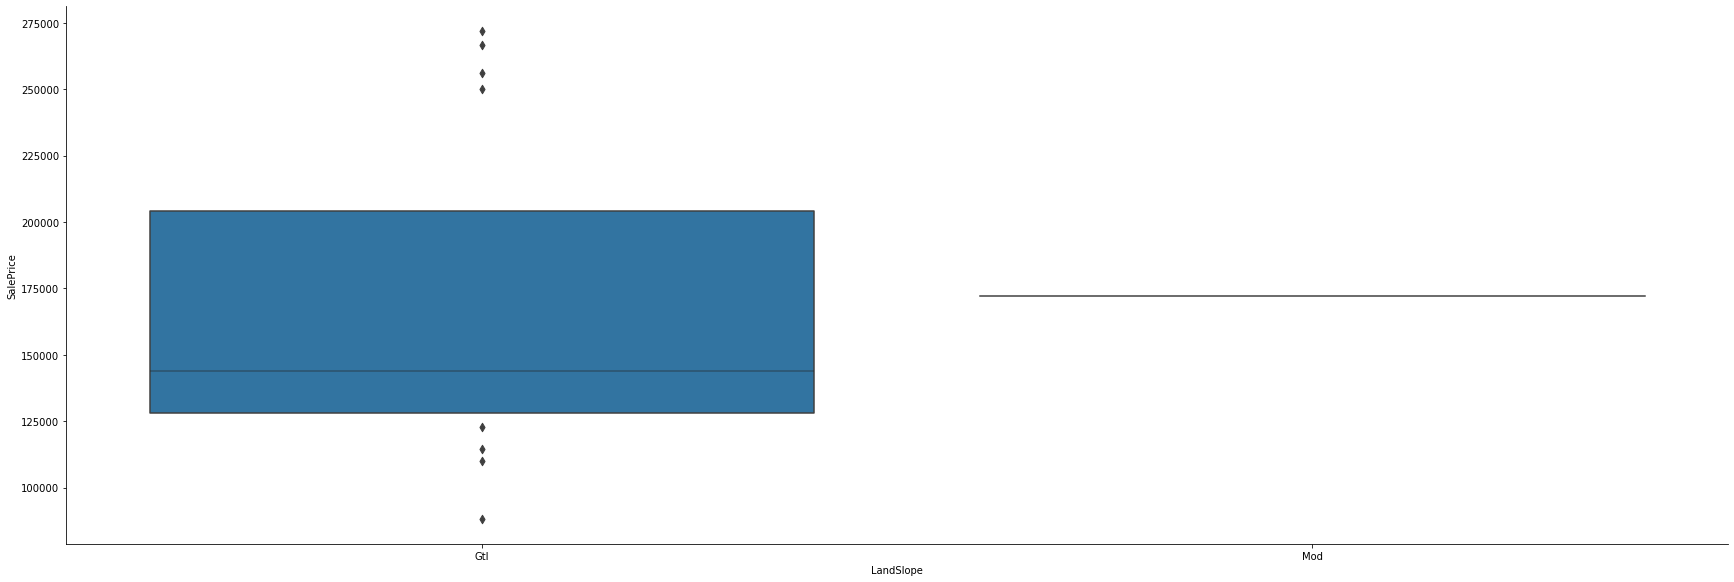

In [62]:
sns.catplot(y="SalePrice",x="LandSlope",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

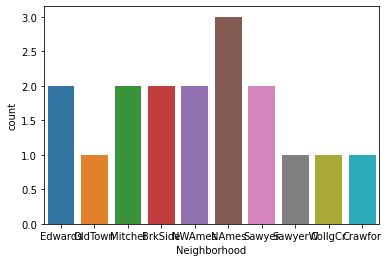

In [63]:
sns.countplot(x='Neighborhood',data=train_data)

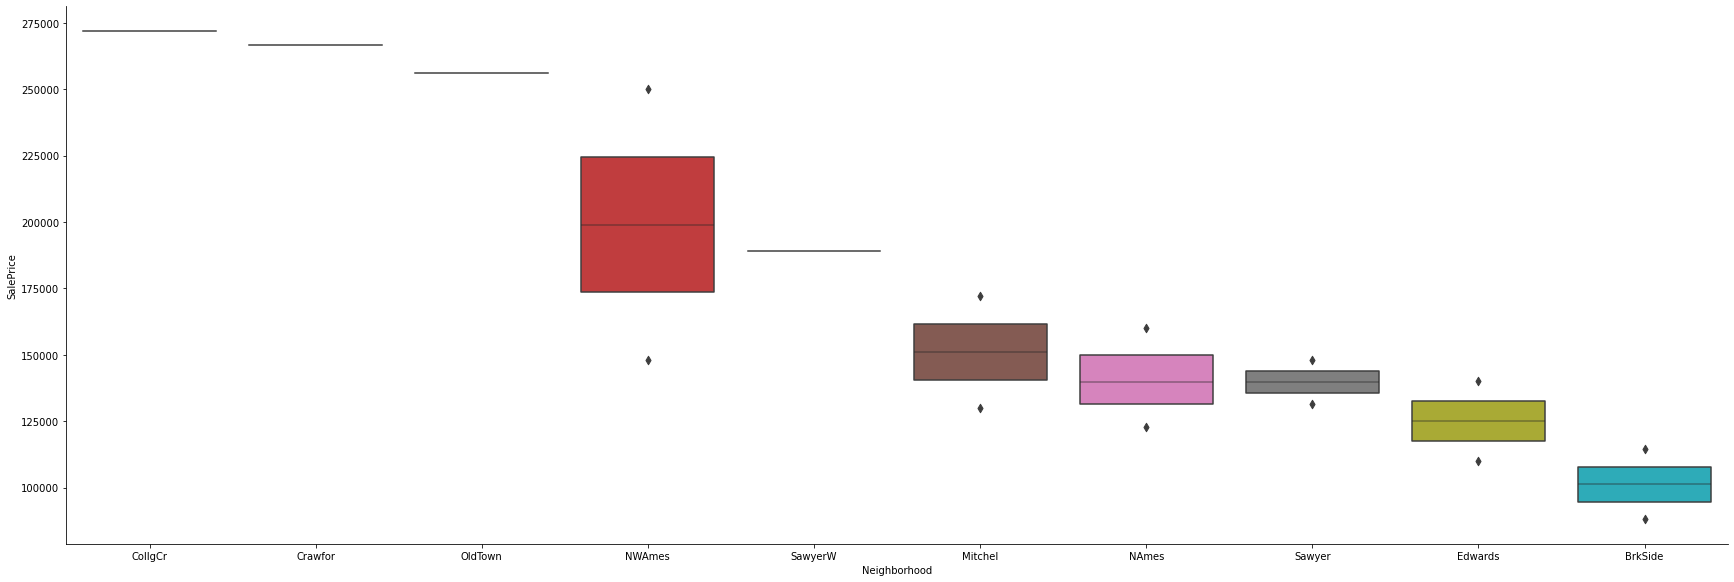

In [64]:
sns.catplot(y="SalePrice",x="Neighborhood",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='Condition1', ylabel='count'>

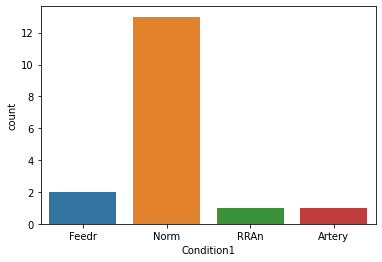

In [65]:
sns.countplot(x='Condition1',data=train_data)

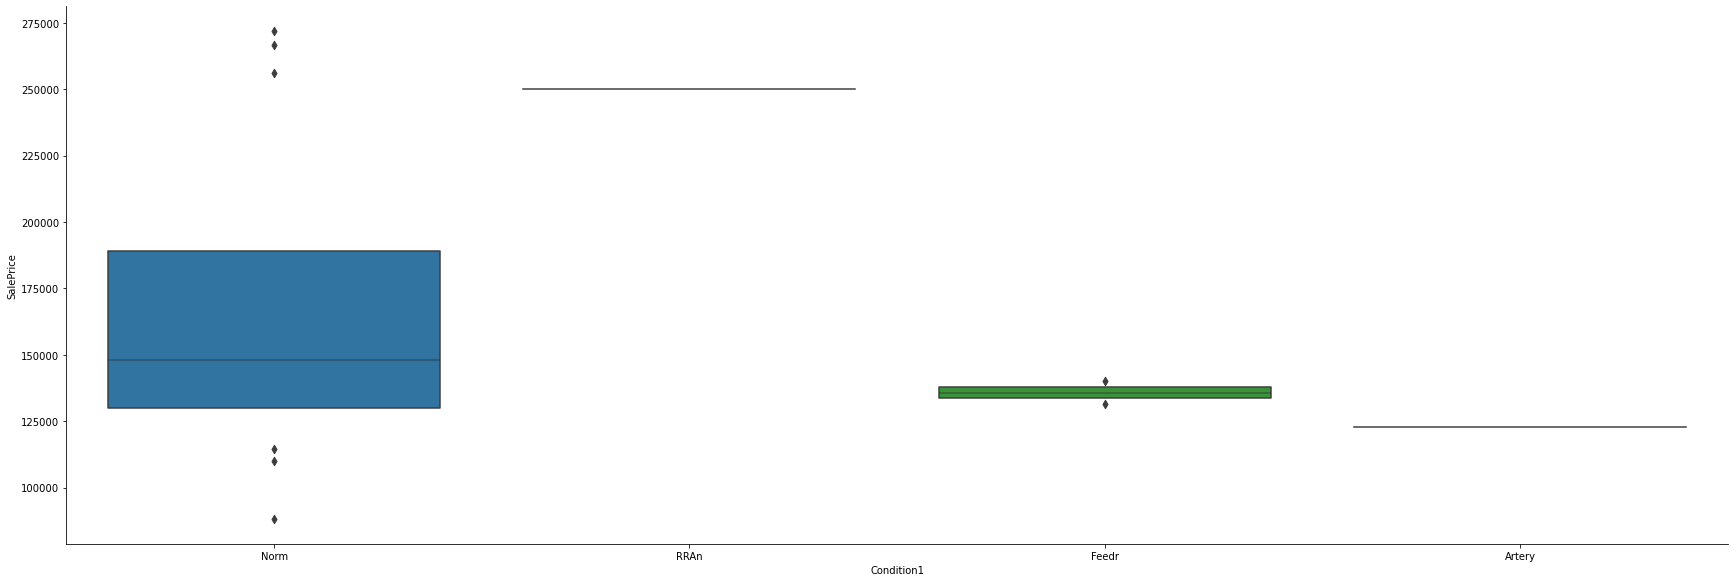

In [66]:
sns.catplot(y="SalePrice",x="Condition1",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

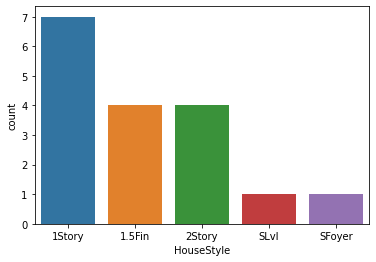

In [69]:
sns.countplot(x='HouseStyle',data=train_data)

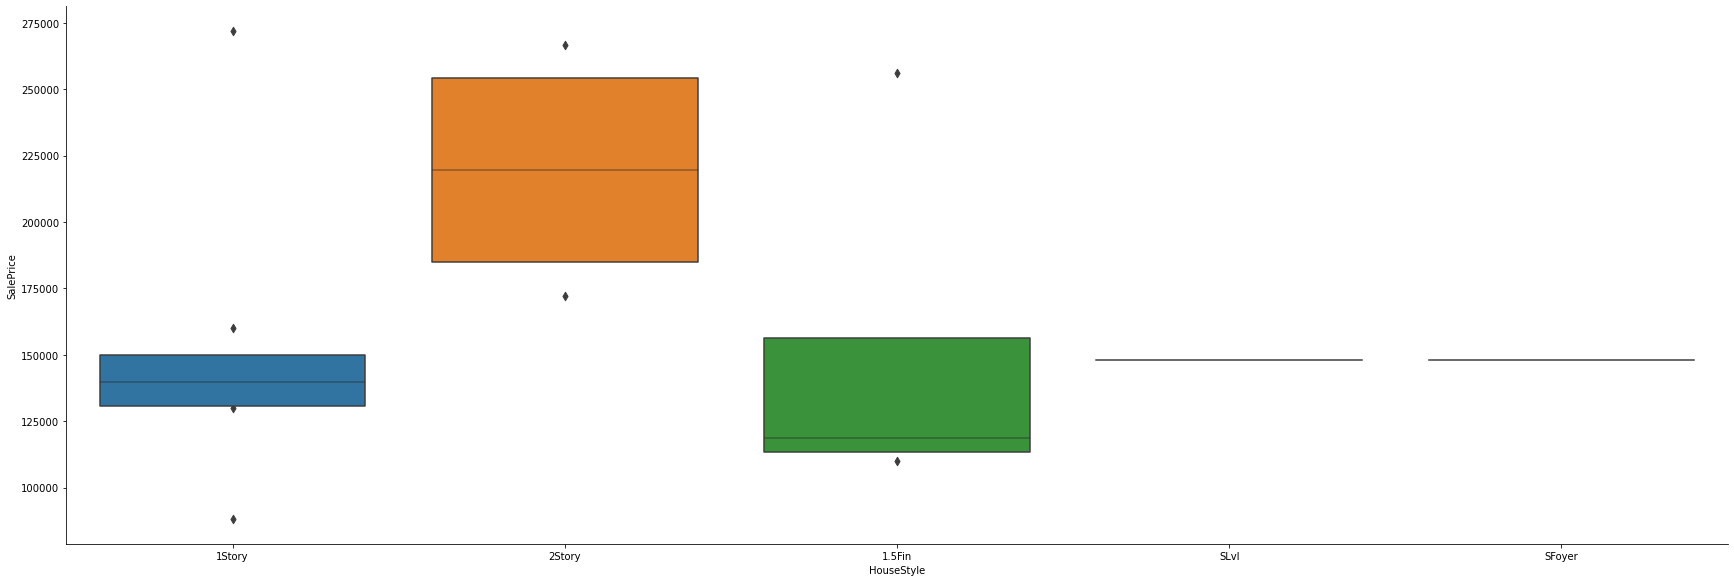

In [70]:
sns.catplot(y="SalePrice",x="HouseStyle",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='OverallQual', ylabel='count'>

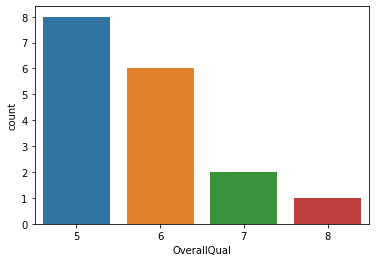

In [71]:
sns.countplot(x='OverallQual',data=train_data)

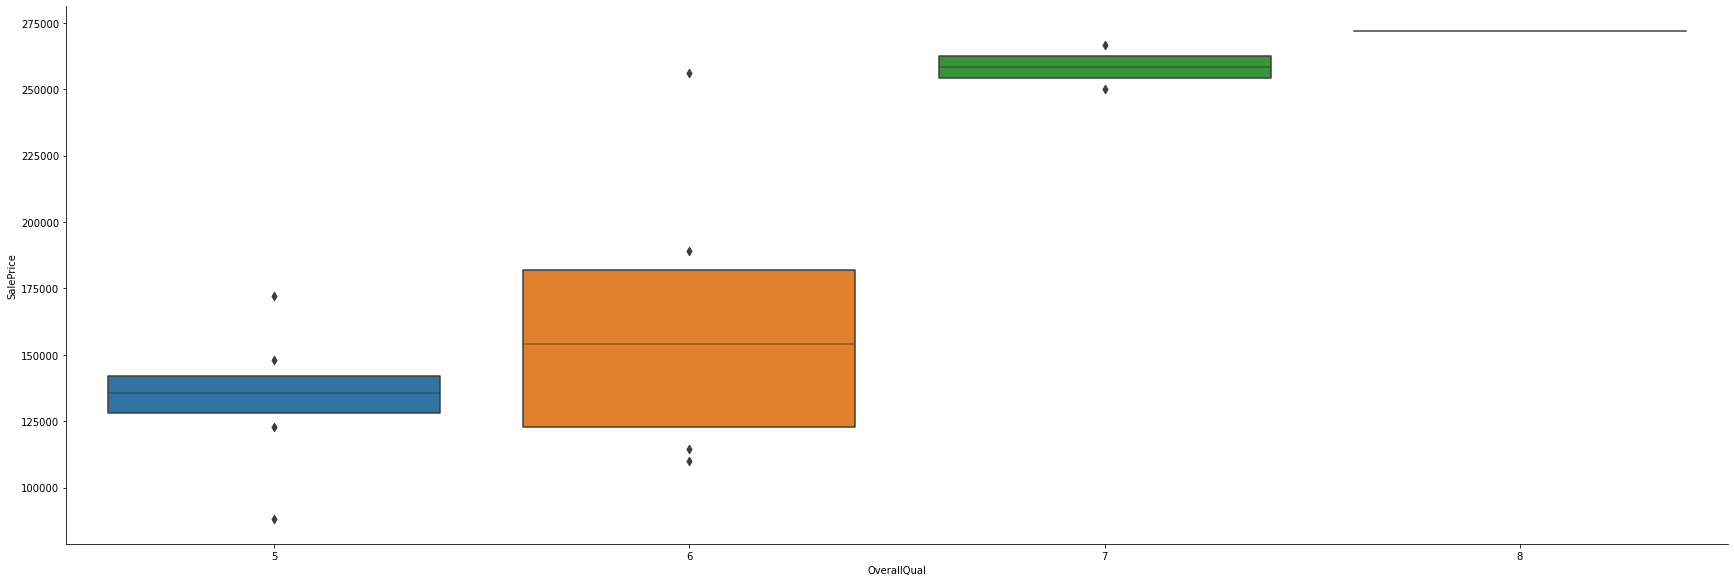

In [72]:
sns.catplot(y="SalePrice",x="OverallQual",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='OverallCond', ylabel='count'>

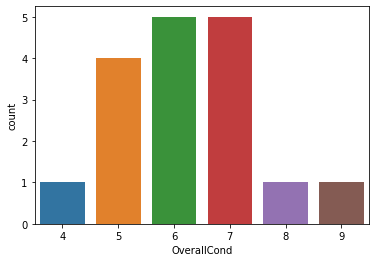

In [73]:
sns.countplot(x='OverallCond',data=train_data)

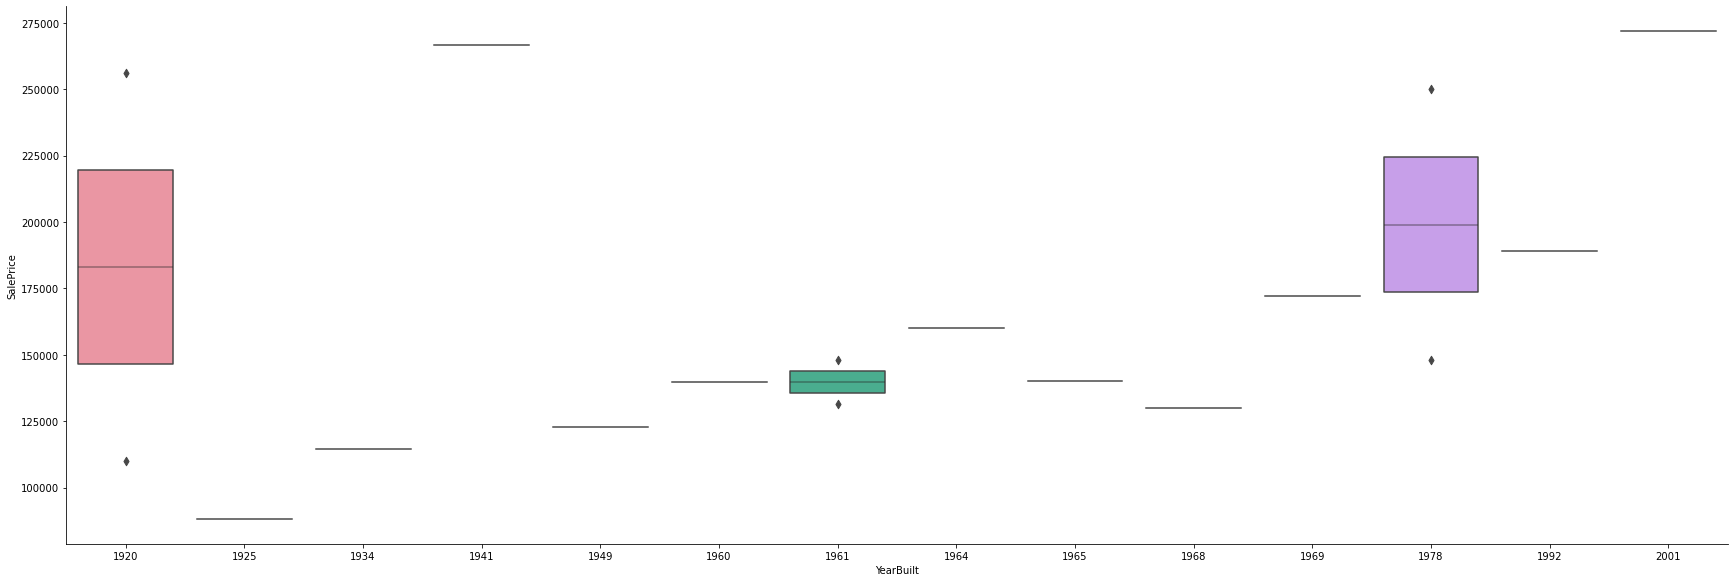

In [75]:
sns.catplot(y="SalePrice",x="YearBuilt",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='YearBuilt', ylabel='count'>

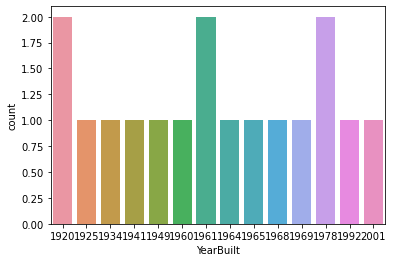

In [74]:
sns.countplot(x='YearBuilt',data=train_data)

In [ ]:
sns.catplot(y="SalePrice",x="HouseStyle",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='YearRemodAdd', ylabel='count'>

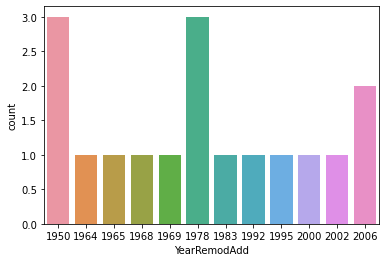

In [76]:
sns.countplot(x='YearRemodAdd',data=train_data)

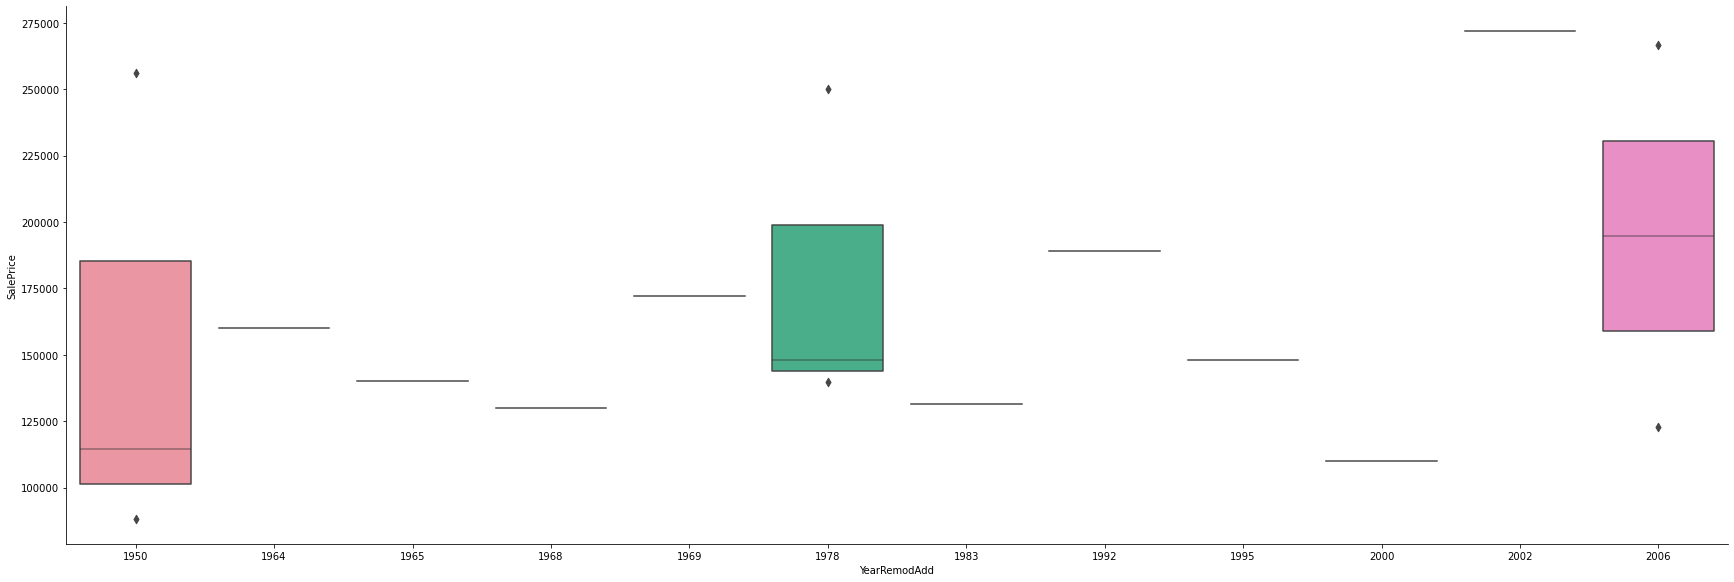

In [77]:
sns.catplot(y="SalePrice",x="YearRemodAdd",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='RoofStyle', ylabel='count'>

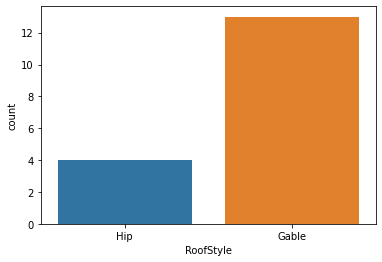

In [78]:
sns.countplot(x='RoofStyle',data=train_data)

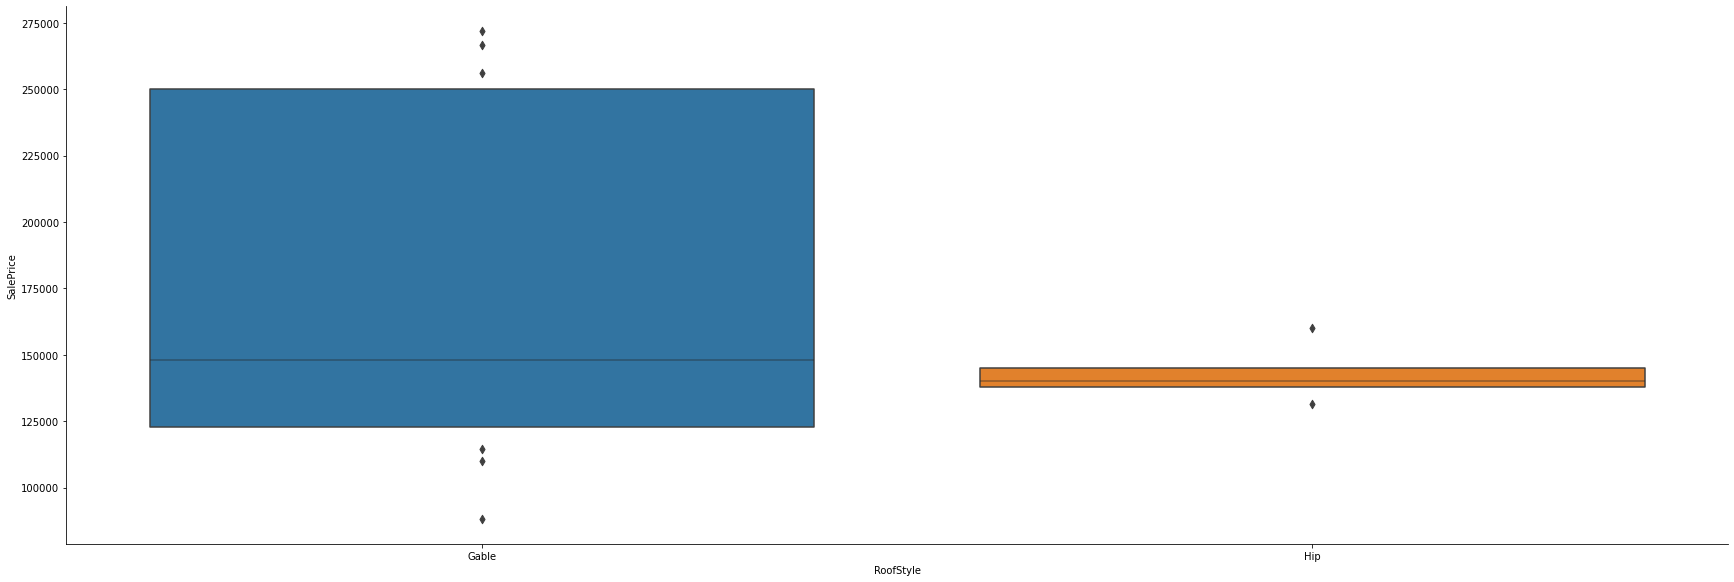

In [79]:
sns.catplot(y="SalePrice",x="RoofStyle",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='Exterior1st', ylabel='count'>

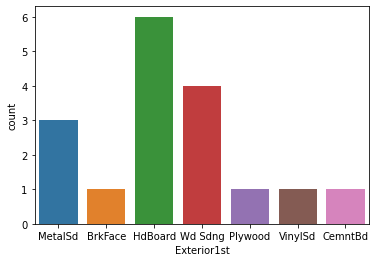

In [81]:
sns.countplot(x='Exterior1st',data=train_data)

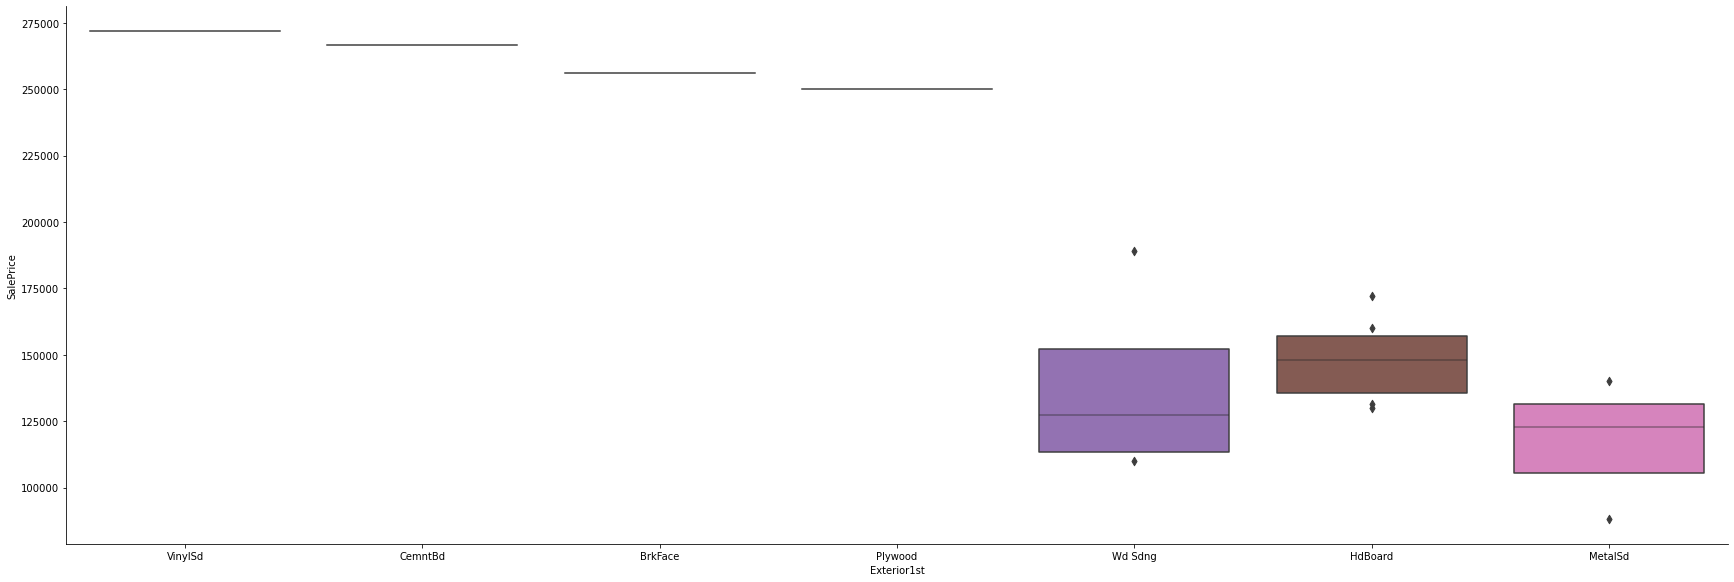

In [82]:
sns.catplot(y="SalePrice",x="Exterior1st",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

In [83]:
sns.countplot(x='Exterior2nd',data=train_data)

<AxesSubplot:xlabel='Exterior2nd', ylabel='count'>

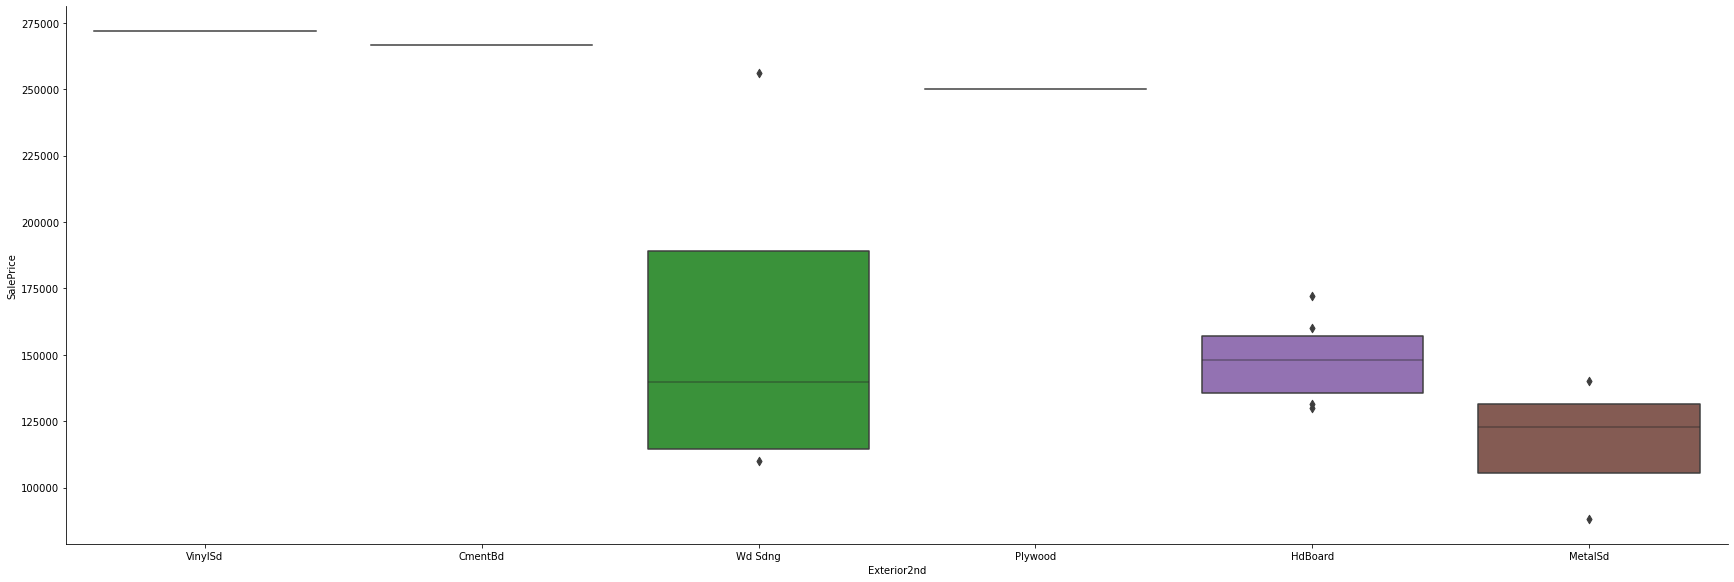

In [84]:
sns.catplot(y="SalePrice",x="Exterior2nd",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

In [87]:
sns.countplot(x='ExterQual',data=train_data)

<AxesSubplot:xlabel='ExterQual', ylabel='count'>

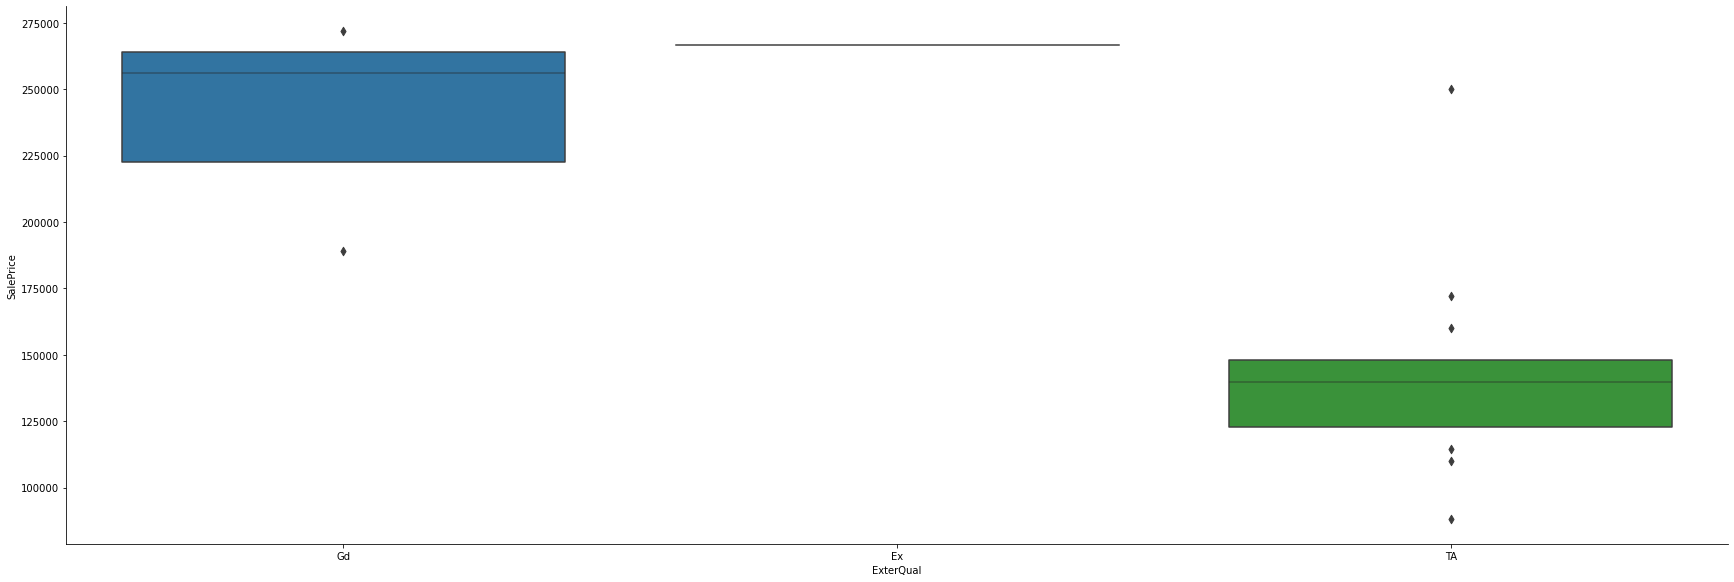

In [88]:
sns.catplot(y="SalePrice",x="ExterQual",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='Foundation', ylabel='count'>

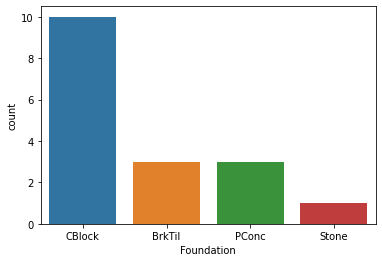

In [90]:
sns.countplot(x='Foundation',data=train_data)

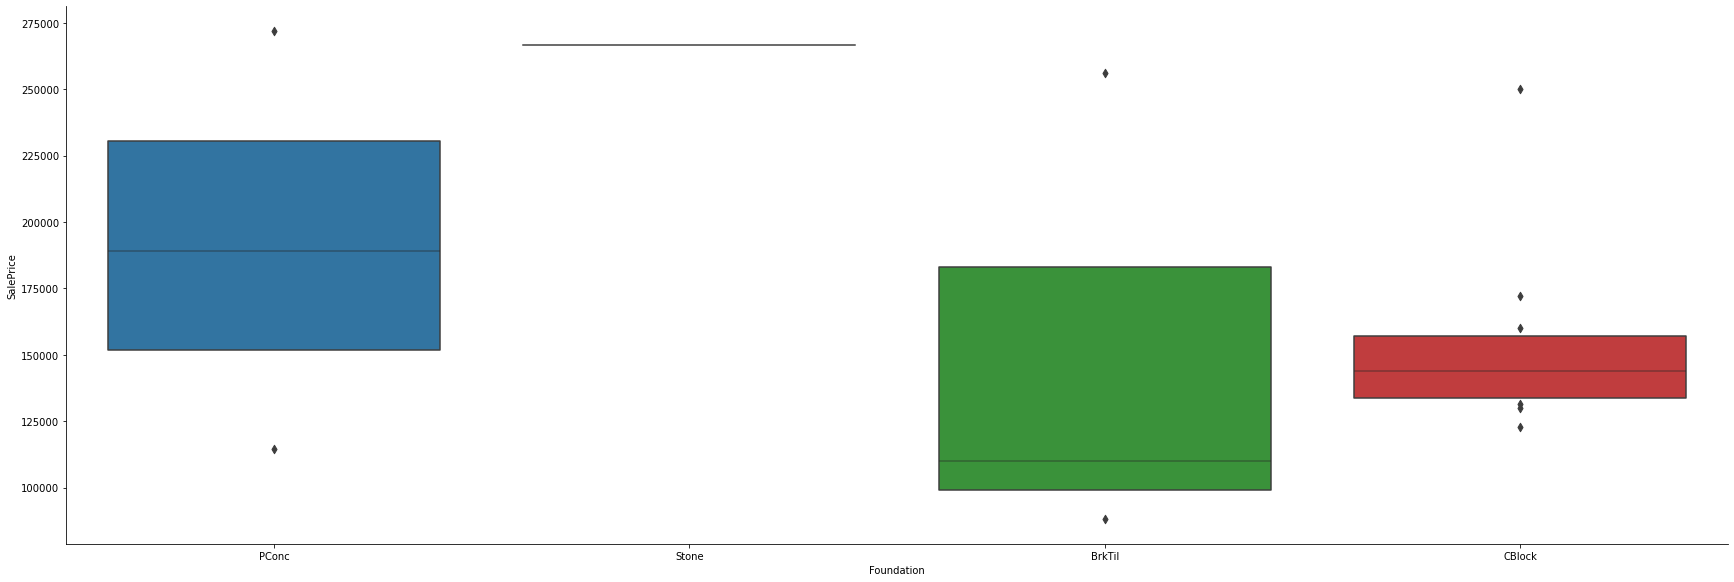

In [91]:
sns.catplot(y="SalePrice",x="Foundation",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

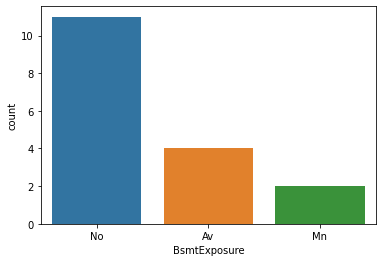

In [94]:
sns.countplot(x='BsmtExposure',data=train_data)

In [95]:
sns.catplot(y="SalePrice",x="BsmtExposure",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

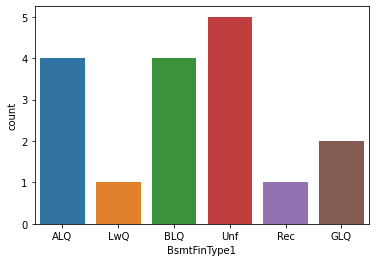

In [98]:
sns.countplot(x='BsmtFinType1',data=train_data)

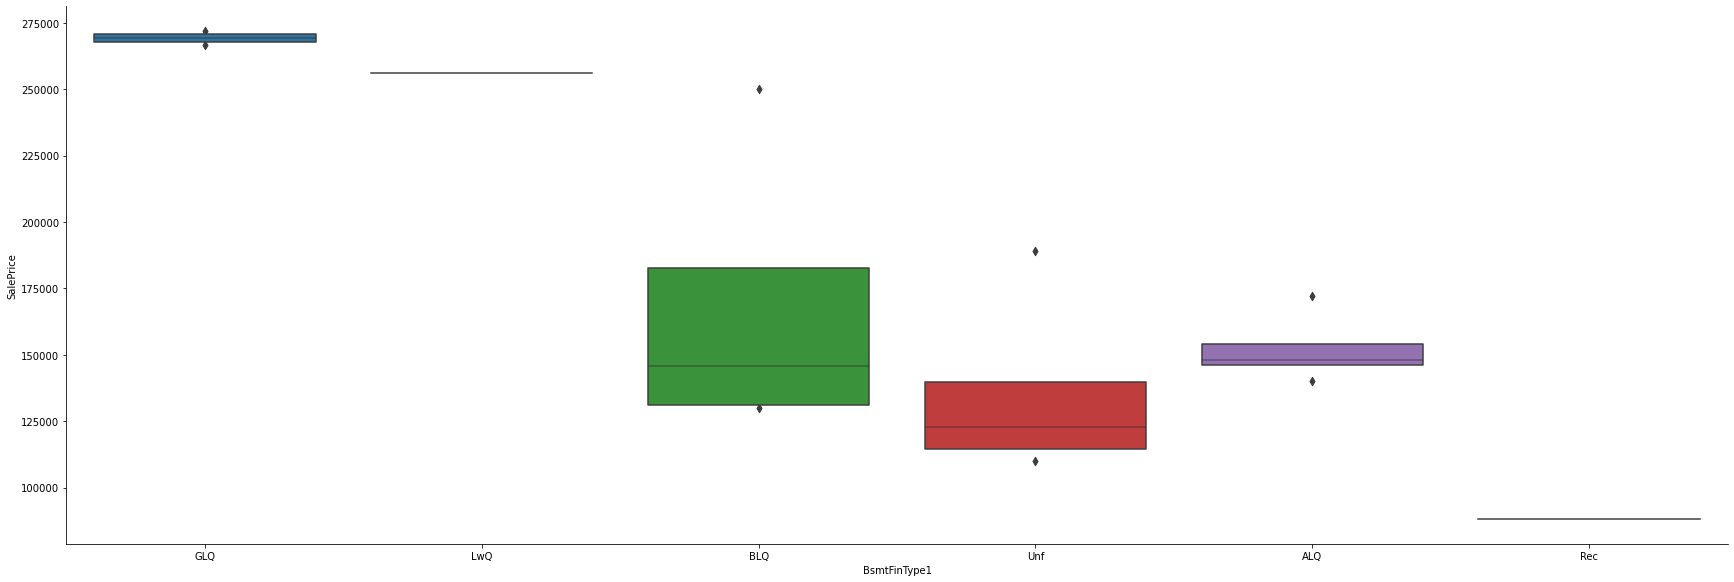

In [99]:
sns.catplot(y="SalePrice",x="BsmtFinType1",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

In [101]:
sns.countplot(x='BsmtFinType2',data=train_data)

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

In [102]:
sns.catplot(y="SalePrice",x="BsmtFinType2",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='Heating', ylabel='count'>

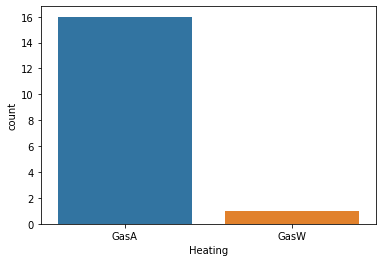

In [106]:
sns.countplot(x='Heating',data=train_data)

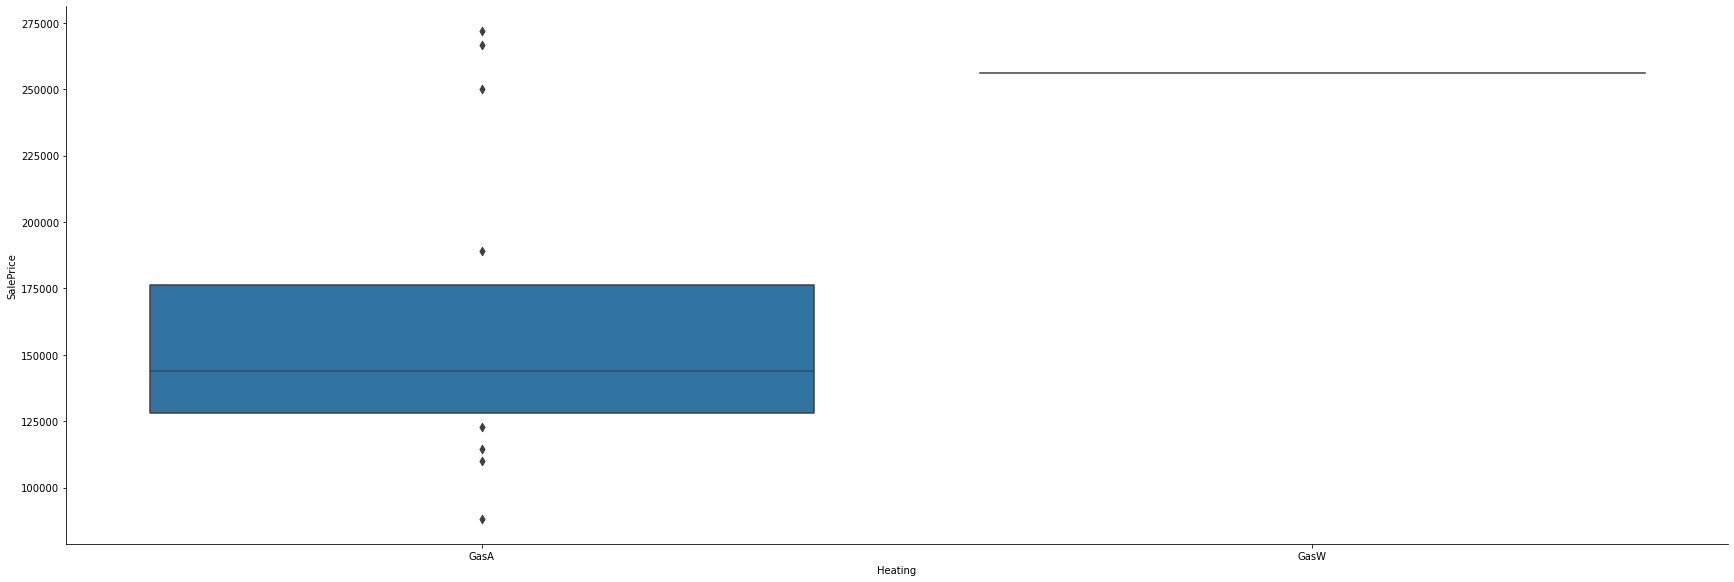

In [107]:
sns.catplot(y="SalePrice",x="Heating",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='HeatingQC', ylabel='count'>

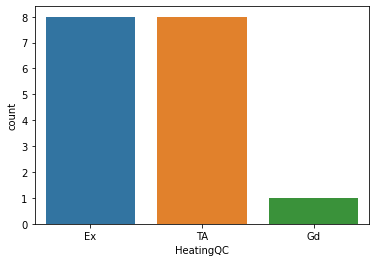

In [108]:
sns.countplot(x='HeatingQC',data=train_data)

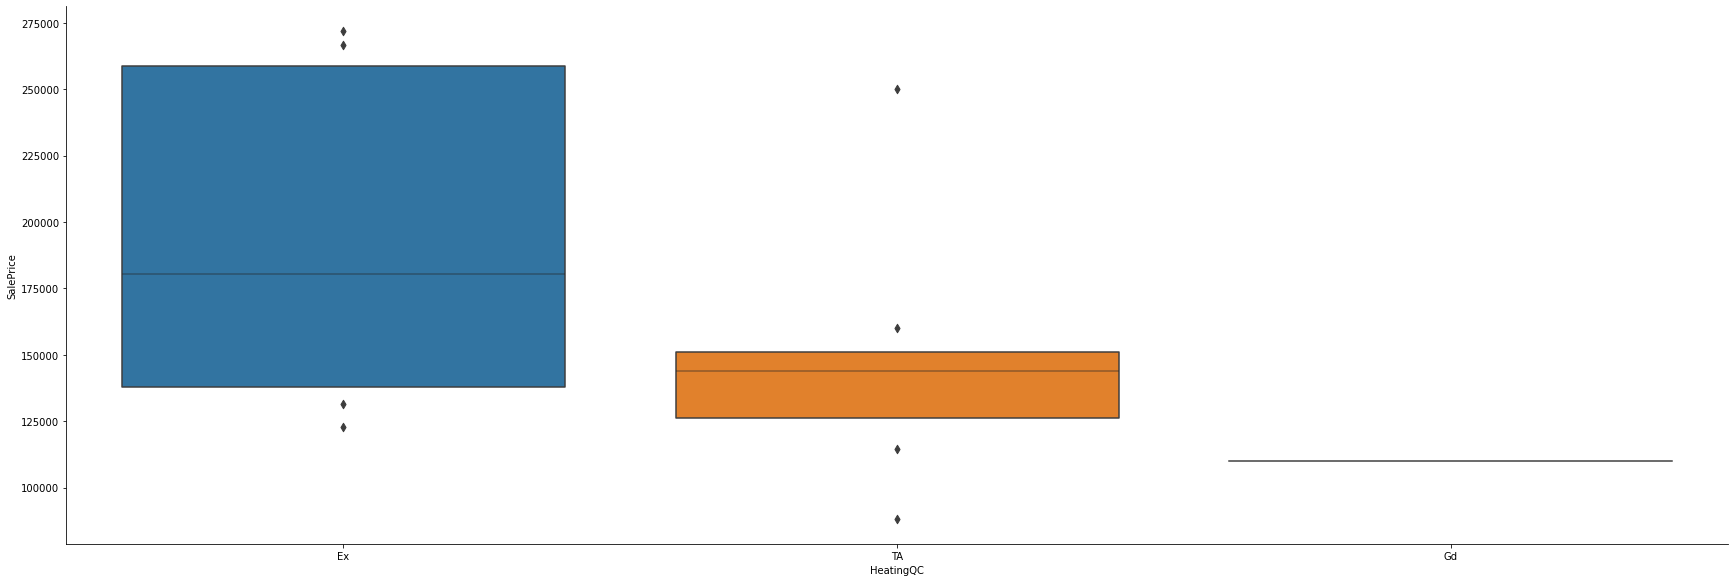

In [109]:
sns.catplot(y="SalePrice",x="HeatingQC",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='CentralAir', ylabel='count'>

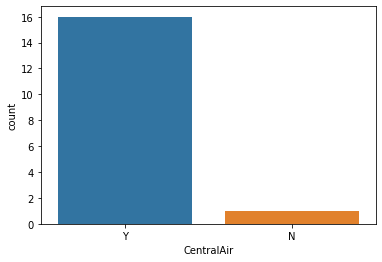

In [110]:
sns.countplot(x='CentralAir',data=train_data)

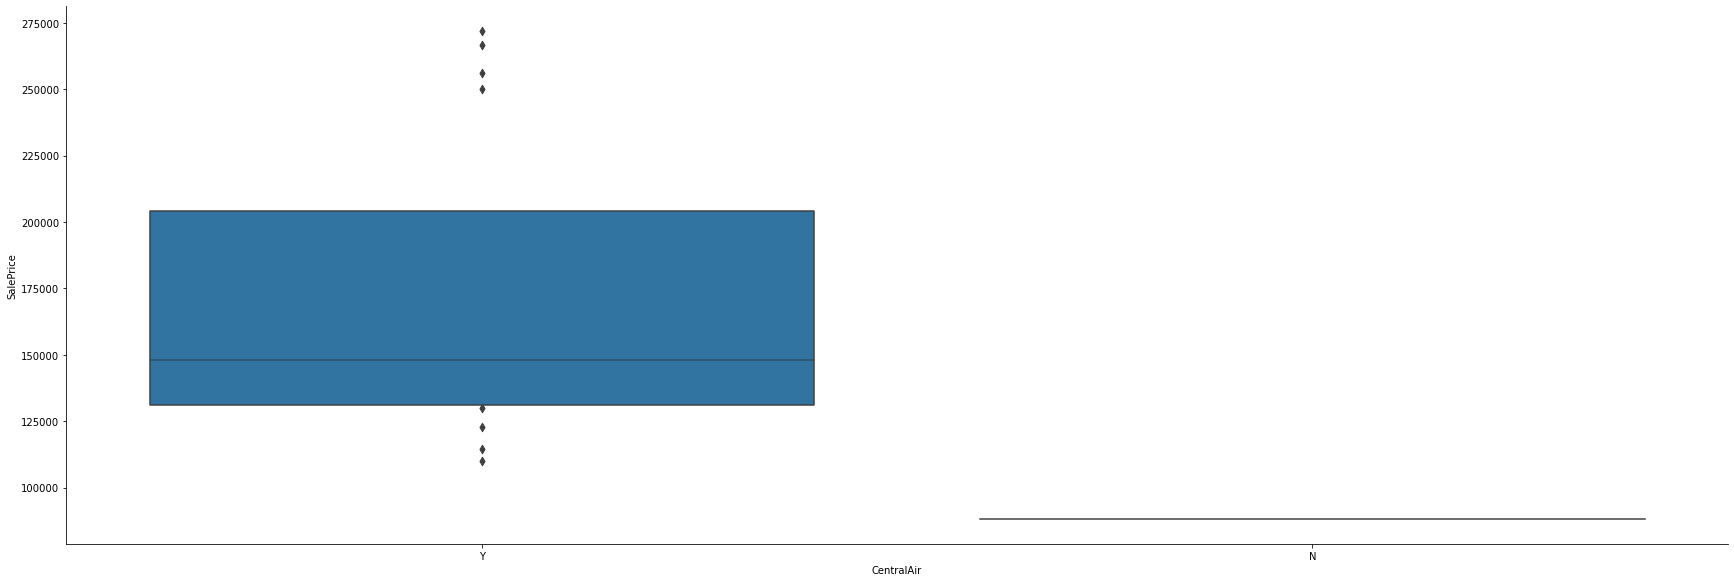

In [111]:
sns.catplot(y="SalePrice",x="CentralAir",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:>

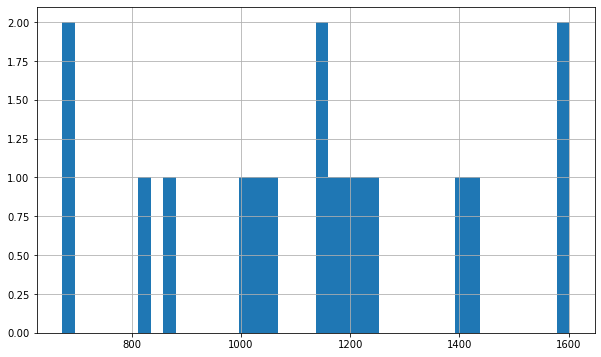

In [114]:
train_data['1stFlrSF'].hist(bins=40,figsize=(10,6))

<AxesSubplot:xlabel='2ndFlrSF', ylabel='count'>

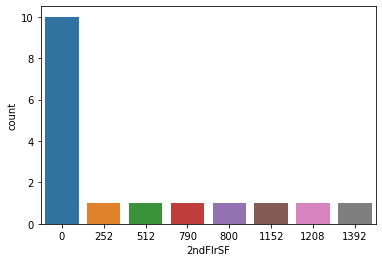

In [117]:
sns.countplot(x='2ndFlrSF',data=train_data)

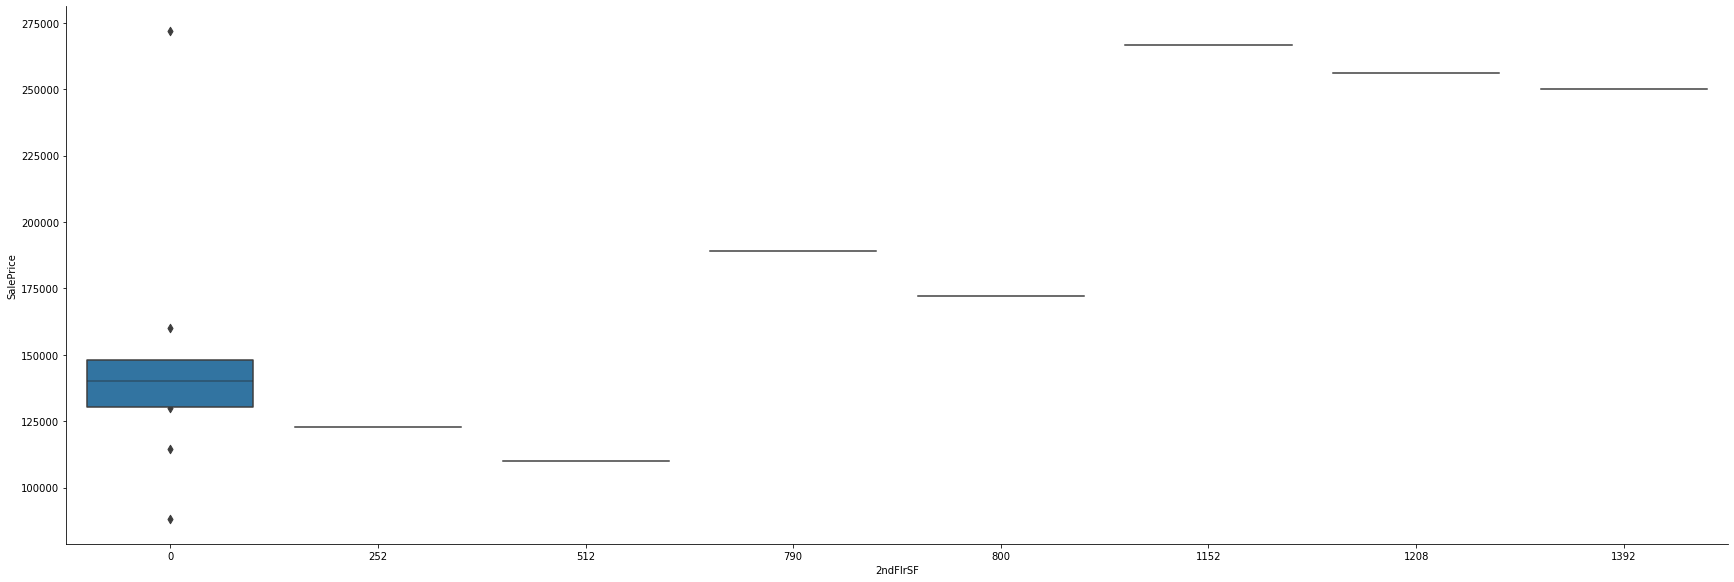

In [118]:
sns.catplot(y="SalePrice",x="2ndFlrSF",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='BsmtFullBath', ylabel='count'>

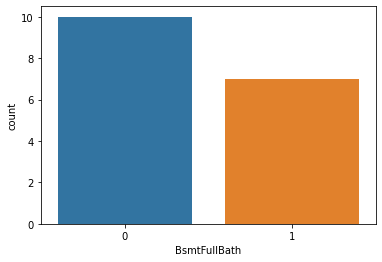

In [121]:
sns.countplot(x='BsmtFullBath',data=train_data)

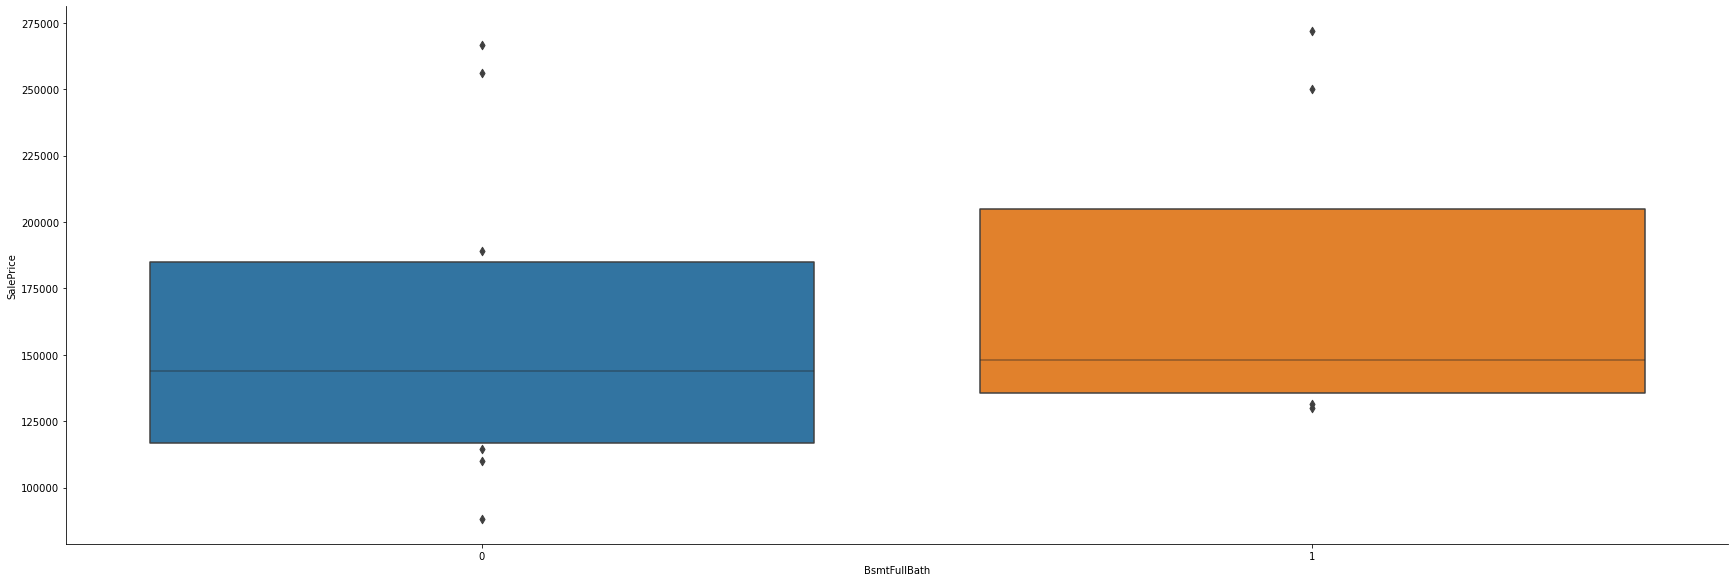

In [122]:
sns.catplot(y="SalePrice",x="BsmtFullBath",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='count'>

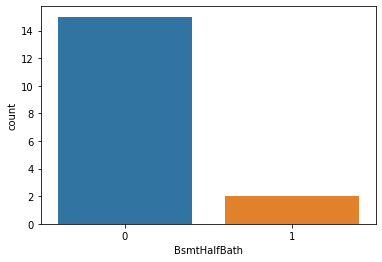

In [123]:
sns.countplot(x='BsmtHalfBath',data=train_data)

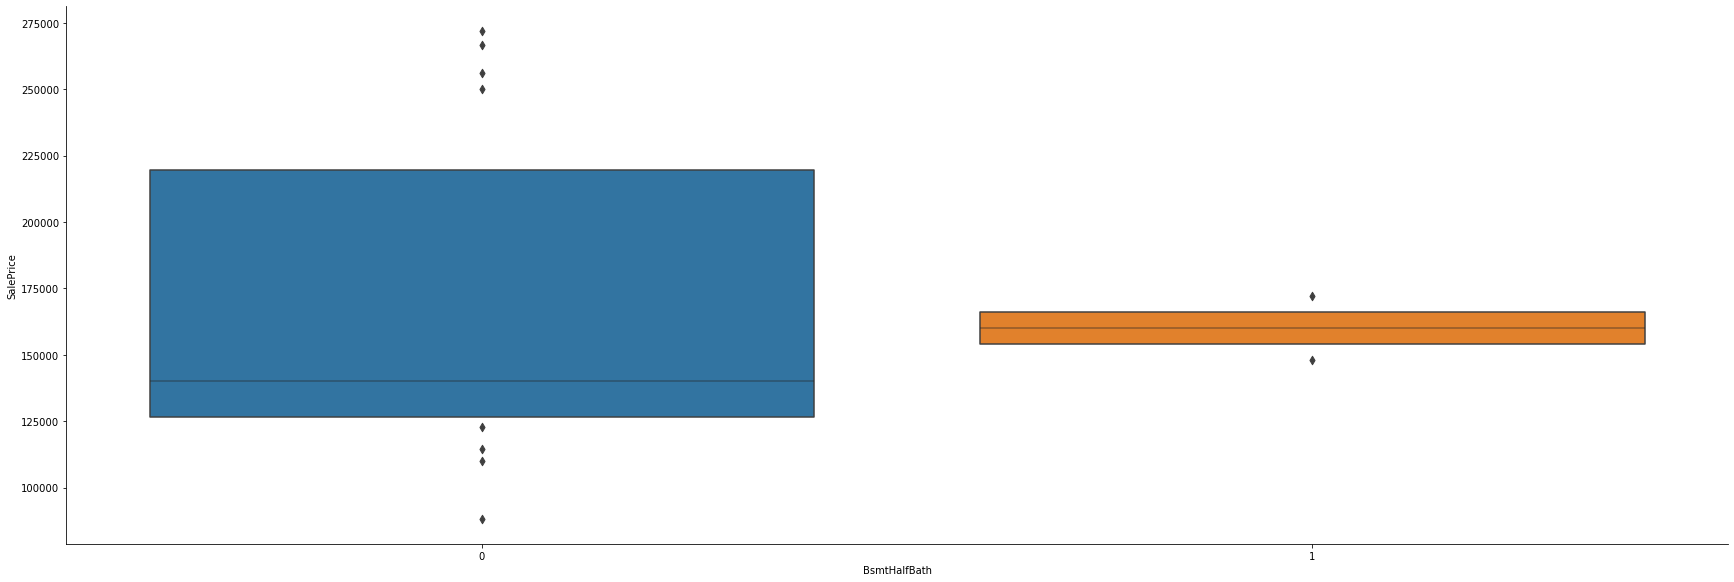

In [124]:
sns.catplot(y="SalePrice",x="BsmtHalfBath",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='count'>

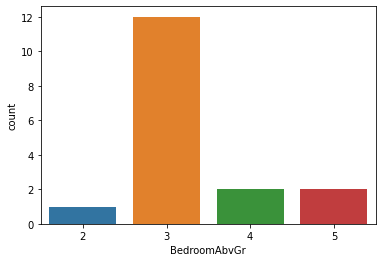

In [125]:
sns.countplot(x='BedroomAbvGr',data=train_data)

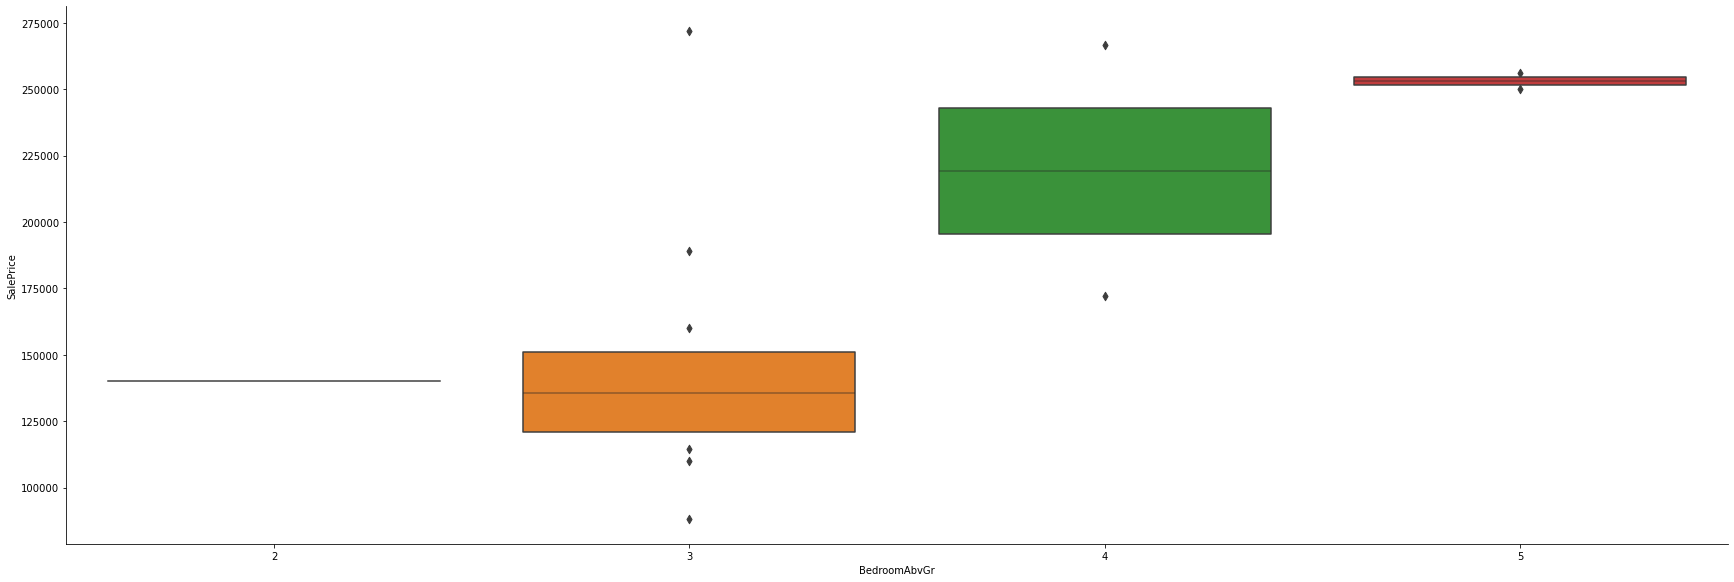

In [126]:
sns.catplot(y="SalePrice",x="BedroomAbvGr",data=train_data.sort_values("SalePrice", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

In [153]:
train_data.drop(['Street','LandContour','Utilities','Condition2','BldgType','YearRemodAdd','RoofMatl','MasVnrArea','ExterCond','BsmtQual','BsmtCond','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Electrical','Fence','MiscFeature','LowQualFinSF','GrLivArea','KitchenAbvGr'],axis=1,inplace=True)

In [154]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [155]:
train_data

Id  MSSubClass MSZoning  LotArea LotShape LotConfig LandSlope  \
0     127         120       RL     4928      IR1    Inside       Gtl   
1     889          20       RL    15865      IR1    Inside       Mod   
2     793          60       RL     9920      IR1   CulDSac       Gtl   
3     110          20       RL    11751      IR1    Inside       Gtl   
4     422          20       RL    16635      IR1       FR2       Gtl   
...   ...         ...      ...      ...      ...       ...       ...   
1163  289          20       RL     9819      IR1    Inside       Gtl   
1164  554          20       RL     8777      Reg    Inside       Gtl   
1165  196         160       RL     2280      Reg       FR2       Gtl   
1166   31          70  C (all)     8500      Reg    Inside       Gtl   
1167  617          60       RL     7861      IR1    Inside       Gtl   

     Neighborhood Condition1 HouseStyle  ...  OpenPorchSF  EnclosedPorch  \
0         NPkVill       Norm     1Story  ...          205              0   
1           NAmes       Norm     1Story  ...          207              0   
2         NoRidge       Norm     2Story  ...          130              0   
3          NWAmes       Norm     1Story  ...          122              0   
4          NWAmes       Norm     1Story  ...            0              0   
...           ...        ...        ...  ...          ...            ...   
1163       Sawyer       Norm     1Story  ...            0              0   
1164      Edwards      Feedr     1Story  ...           96              0   
1165      NPkVill       Norm     2Story  ...            0              0   
1166       IDOTRR      Feedr     2Story  ...           54            172   
1167      Gilbert       Norm     2Story  ...           75              0   

      3SsnPorch ScreenPorch PoolArea MoSold YrSold SaleType SaleCondition  \
0             0           0        0      2   2007       WD        Normal   
1             0         224        0     10   2007       WD        Normal   
2             0           0        0      6   2007       WD        Normal   
3             0           0        0      1   2010      COD        Normal   
4             0           0        0      6   2009       WD        Normal   
...         ...         ...      ...    ...    ...      ...           ...   
1163          0           0        0      2   2010       WD        Normal   
1164          0           0        0      5   2009       WD        Normal   
1165          0           0        0      7   2009       WD        Normal   
1166          0           0        0      7   2008       WD        Normal   
1167          0           0        0      6   2006       WD        Normal   

     SalePrice  
0       128000  
1       268000  
2       269790  
3       190000  
4       215000  
...        ...  
1163    122000  
1164    108000  
1165    148500  
1166     40000  
1167    183200  

[1168 rows x 55 columns]

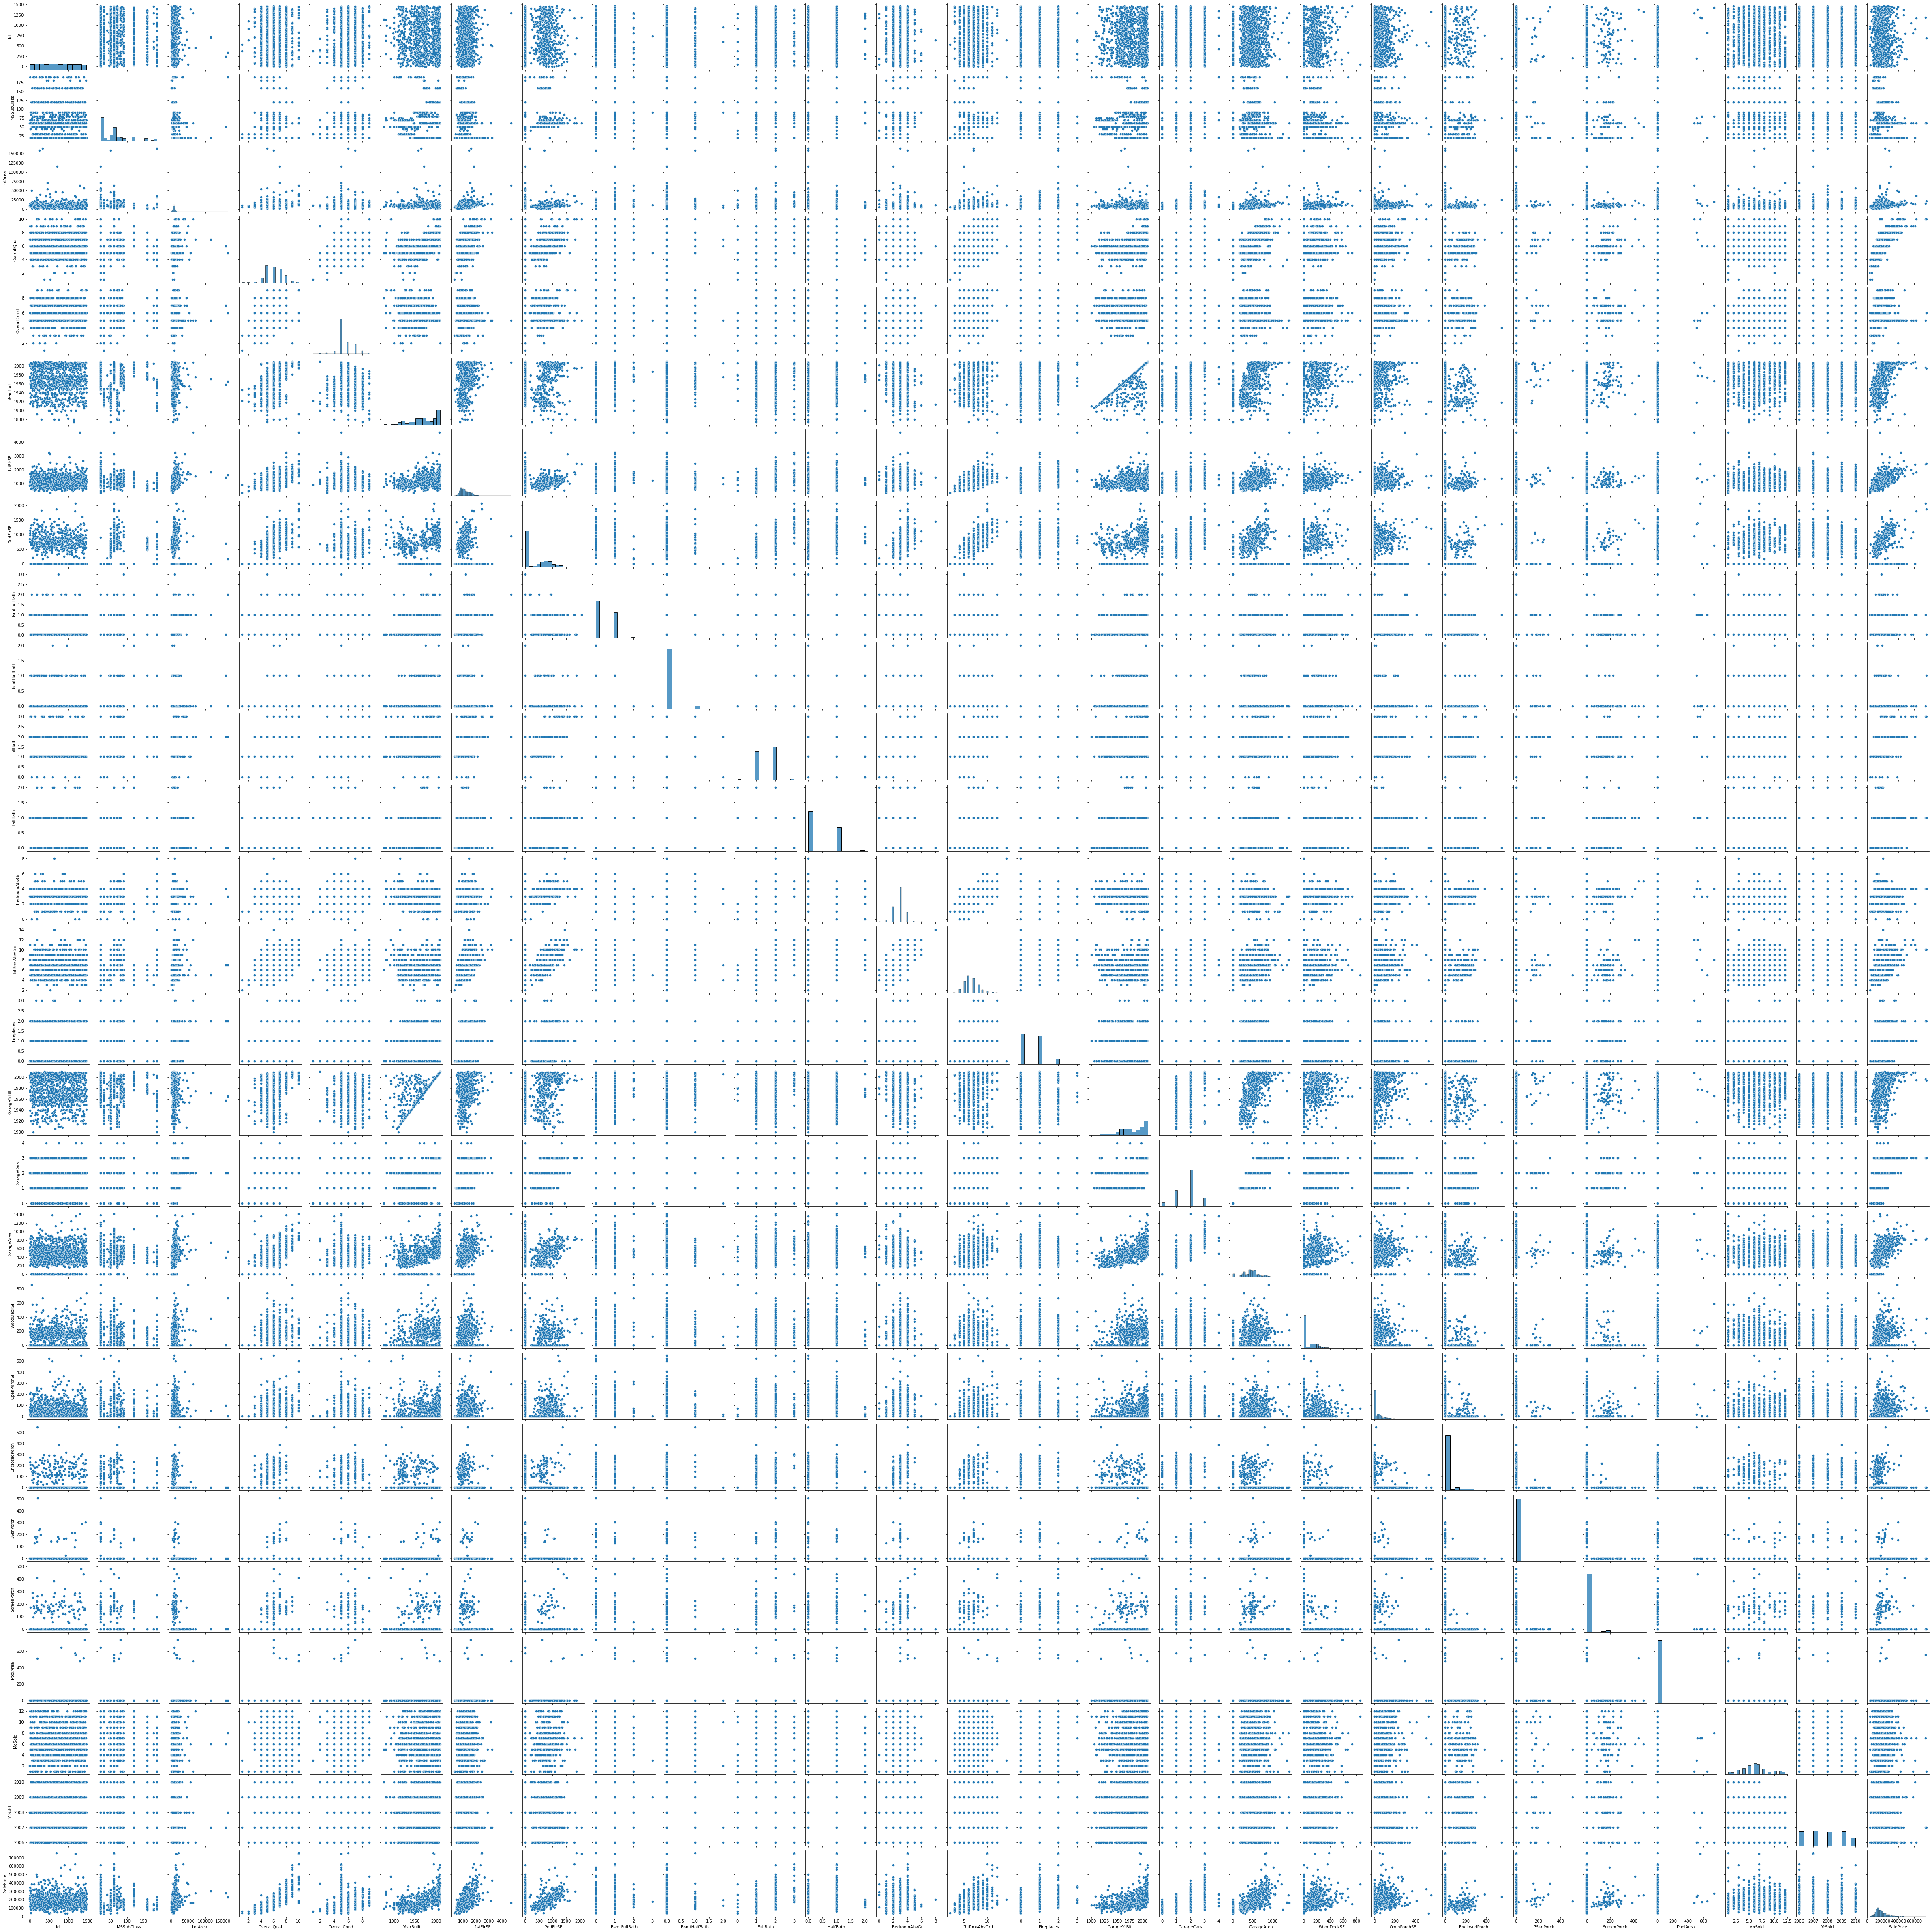

In [156]:
sns.pairplot(train_data)

In [159]:
test_data=pd.read_excel(r"/Users/rinki/Desktop/test.xlsx")
test_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [160]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [7]:
train_data.dropna(inplace=True)

In [161]:
test_data.drop(['MiscFeature','Fence','PoolQC','Alley'],axis=1, inplace=True)

In [166]:
test_data.dropna(inplace=True)

<AxesSubplot:>

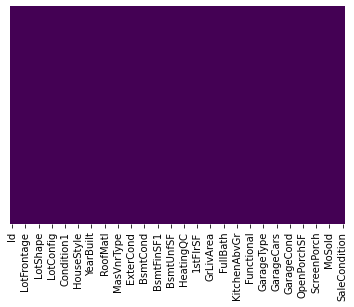

In [167]:
sns.heatmap(test_data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [168]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [182]:
#encoding dataframe
from sklearn.preprocessing import OrdinalEncoder
train_data1=OrdinalEncoder()
for i in train_data.columns:
    if train_data[i].dtypes=='object':
        train_data[i]=train_data1.fit_transform(train_data[i].values.reshape(-1,1))
train_data1

OrdinalEncoder()

In [183]:
x=train_data.loc[:, ['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]
x.head()

Id  MSSubClass  MSZoning  LotArea  LotShape  LotConfig  LandSlope  \
0  127         120       3.0     4928       0.0        4.0        0.0   
1  889          20       3.0    15865       0.0        4.0        1.0   
2  793          60       3.0     9920       0.0        1.0        0.0   
3  110          20       3.0    11751       0.0        4.0        0.0   
4  422          20       3.0    16635       0.0        2.0        0.0   

   Neighborhood  Condition1  HouseStyle  ...  WoodDeckSF  OpenPorchSF  \
0          13.0         2.0         2.0  ...           0          205   
1          12.0         2.0         2.0  ...          81          207   
2          15.0         2.0         5.0  ...         180          130   
3          14.0         2.0         2.0  ...           0          122   
4          14.0         2.0         2.0  ...         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MoSold  YrSold  SaleType  \
0              0          0            0         0       2    2007       8.0   
1              0          0          224         0      10    2007       8.0   
2              0          0            0         0       6    2007       8.0   
3              0          0            0         0       1    2010       0.0   
4              0          0            0         0       6    2009       8.0   

   SaleCondition  
0            4.0  
1            4.0  
2            4.0  
3            4.0  
4            4.0  

[5 rows x 54 columns]

In [188]:
train_data.describe()

Id   MSSubClass     MSZoning        LotArea     LotShape  \
count  1071.000000  1071.000000  1071.000000    1071.000000  1071.000000   
mean    724.518207    55.947712     3.014939   10669.985994     1.900093   
std     416.756579    40.851487     0.623347    9253.315076     1.422223   
min       1.000000    20.000000     0.000000    1300.000000     0.000000   
25%     360.000000    20.000000     3.000000    7800.000000     0.000000   
50%     713.000000    50.000000     3.000000    9600.000000     3.000000   
75%    1083.500000    70.000000     3.000000   11757.500000     3.000000   
max    1460.000000   190.000000     4.000000  164660.000000     3.000000   

         LotConfig    LandSlope  Neighborhood   Condition1   HouseStyle  ...  \
count  1071.000000  1071.000000   1071.000000  1071.000000  1071.000000  ...   
mean      2.986928     0.064426     12.278245     2.056022     3.099907  ...   
std       1.651908     0.284415      6.042767     0.893716     1.905307  ...   
min       0.000000     0.000000      0.000000     0.000000     0.000000  ...   
25%       1.000000     0.000000      7.000000     2.000000     2.000000  ...   
50%       4.000000     0.000000     12.000000     2.000000     2.000000  ...   
75%       4.000000     0.000000     17.000000     2.000000     5.000000  ...   
max       4.000000     2.000000     24.000000     8.000000     7.000000  ...   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1071.000000    1071.000000  1071.000000  1071.000000  1071.000000   
mean     47.523810      22.212885     3.801120    16.414566     3.760971   
std      64.939347      62.749818    29.876203    57.328305    46.875305   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      28.000000       0.000000     0.000000     0.000000     0.000000   
75%      72.000000       0.000000     0.000000     0.000000     0.000000   
max     547.000000     552.000000   508.000000   480.000000   738.000000   

            MoSold       YrSold     SaleType  SaleCondition      SalePrice  
count  1071.000000  1071.000000  1071.000000    1071.000000    1071.000000  
mean      6.384687  2007.797386     7.450047       3.814192  187212.879552  
std       2.676570     1.327295     1.650001       1.056367   78367.298698  
min       1.000000  2006.000000     0.000000       0.000000   35311.000000  
25%       5.000000  2007.000000     8.000000       4.000000  135000.000000  
50%       6.000000  2008.000000     8.000000       4.000000  169500.000000  
75%       8.000000  2009.000000     8.000000       4.000000  222000.000000  
max      12.000000  2010.000000     8.000000       5.000000  755000.000000  

[8 rows x 55 columns]

<AxesSubplot:>

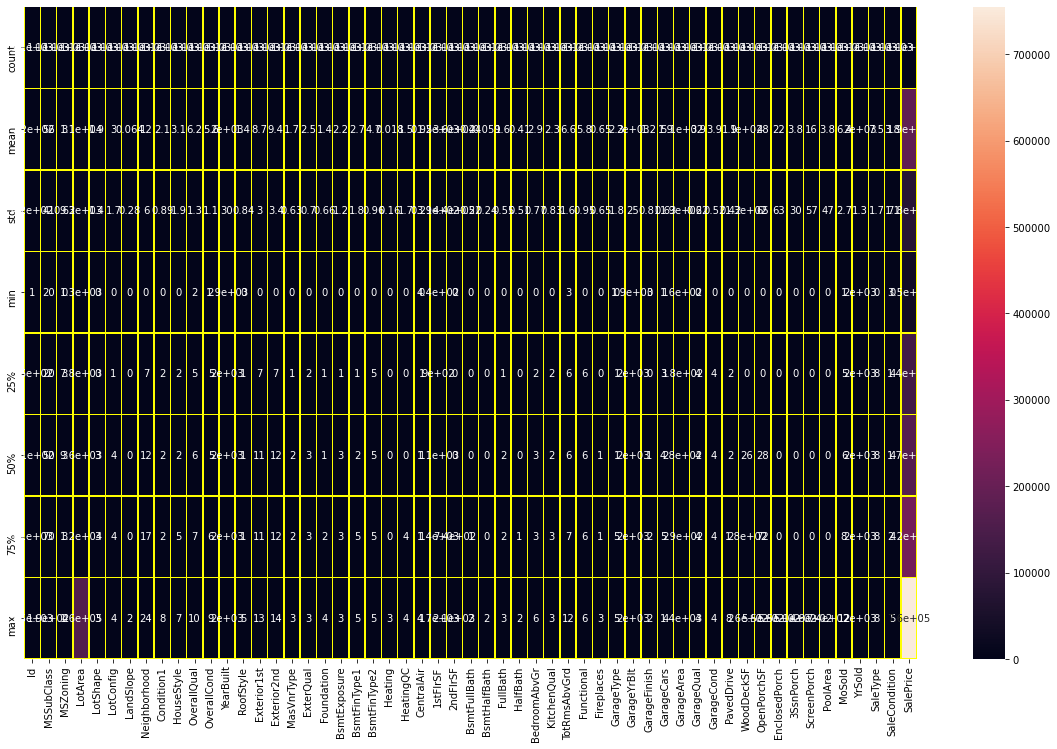

In [191]:
plt.figure(figsize=(20,12))
sns.heatmap(train_data.describe(), annot=True, linewidth=.5,linecolor='yellow')

In [184]:
y=train_data.iloc[:,-1]
y.head()

0    128000
1    268000
2    269790
3    190000
4    215000
Name: SalePrice, dtype: int64

In [185]:
train_data.corr()

Id  MSSubClass  MSZoning   LotArea  LotShape  LotConfig  \
Id             1.000000    0.007506  0.001740 -0.030631  0.023184   0.062099   
MSSubClass     0.007506    1.000000 -0.005511 -0.115761  0.084070   0.065829   
MSZoning       0.001740   -0.005511  1.000000 -0.016779  0.050178  -0.037022   
LotArea       -0.030631   -0.115761 -0.016779  1.000000 -0.186571  -0.150527   
LotShape       0.023184    0.084070  0.050178 -0.186571  1.000000   0.207492   
LotConfig      0.062099    0.065829 -0.037022 -0.150527  0.207492   1.000000   
LandSlope      0.007011    0.002382 -0.026520  0.419922 -0.097285  -0.010141   
Neighborhood  -0.011441    0.001127 -0.255917  0.006273 -0.042327  -0.033621   
Condition1    -0.005553   -0.045356 -0.031700  0.024139 -0.138236   0.008093   
HouseStyle     0.004819    0.388177 -0.127949 -0.045596 -0.119784  -0.039968   
OverallQual   -0.048604    0.091614 -0.148433  0.087427 -0.193818  -0.025481   
OverallCond    0.038636   -0.109002  0.194427  0.024285  0.014243  -0.051281   
YearBuilt     -0.024321    0.052627 -0.326702 -0.014662 -0.231516   0.019941   
RoofStyle      0.039375   -0.100202  0.014877  0.025914 -0.004326  -0.012221   
Exterior1st   -0.039082   -0.077677 -0.001554  0.043502 -0.012663   0.008718   
Exterior2nd   -0.037919   -0.111522  0.018327  0.023506 -0.022225  -0.004894   
MasVnrType     0.063519   -0.019413 -0.035649  0.001527 -0.013545  -0.009464   
ExterQual     -0.006671   -0.044854  0.178614 -0.049506  0.151080  -0.022385   
Foundation    -0.017528    0.072472 -0.262640 -0.030700 -0.162456   0.000229   
BsmtExposure  -0.027384   -0.046905  0.051931 -0.139540  0.123571  -0.002253   
BsmtFinType1   0.003714    0.018691  0.030280 -0.043876  0.084153   0.016729   
BsmtFinType2   0.037575    0.049384 -0.028247 -0.082766  0.025323   0.009253   
Heating        0.050050    0.064781  0.054291 -0.001561  0.062018   0.011642   
HeatingQC      0.013386   -0.016708  0.137478 -0.000418  0.093027  -0.017455   
CentralAir     0.005341   -0.118830 -0.029823  0.031756 -0.108243  -0.020358   
1stFlrSF       0.010172   -0.234932 -0.014873  0.300192 -0.165355  -0.058803   
2ndFlrSF      -0.035326    0.300374 -0.053105  0.057290 -0.076522  -0.042467   
BsmtFullBath   0.034697   -0.018796 -0.017430  0.143267 -0.058689  -0.025043   
BsmtHalfBath  -0.051482    0.007675  0.006633  0.057888 -0.001938  -0.005145   
FullBath      -0.018018    0.132112 -0.194606  0.111350 -0.192373   0.011388   
HalfBath      -0.047067    0.189000 -0.128804 -0.001408 -0.118463  -0.023770   
BedroomAbvGr   0.012920   -0.065080  0.019278  0.117915 -0.076569  -0.053407   
KitchenQual    0.002784   -0.019318  0.116858 -0.067604  0.112742  -0.009261   
TotRmsAbvGrd  -0.005458    0.027231 -0.016606  0.178832 -0.148530  -0.044015   
Functional     0.019351   -0.007459 -0.091804 -0.021255 -0.035215  -0.027047   
Fireplaces    -0.022717   -0.011442  0.008262  0.277142 -0.180057  -0.044229   
GarageType     0.009518    0.101867  0.139812 -0.136419  0.175419   0.024042   
GarageYrBlt   -0.002147    0.074490 -0.269806 -0.035356 -0.199448  -0.010739   
GarageFinish   0.006207   -0.025900  0.162747 -0.102948  0.232674   0.006647   
GarageCars     0.004163    0.026312 -0.135537  0.137232 -0.174598  -0.059733   
GarageArea     0.008455   -0.060121 -0.186458  0.182813 -0.132052  -0.053912   
GarageQual    -0.008004   -0.015881 -0.179064  0.010590 -0.107324   0.032104   
GarageCond     0.002516   -0.036646 -0.093913  0.038240 -0.084719   0.024719   
PavedDrive    -0.012257   -0.024223 -0.110795 -0.010497 -0.125853  -0.040657   
WoodDeckSF    -0.028274   -0.022494 -0.012506  0.215593 -0.131307  -0.049093   
OpenPorchSF   -0.017356    0.020746 -0.138488  0.094126 -0.103619  -0.054178   
EnclosedPorch  0.000781   -0.014527  0.144257 -0.006864  0.072130  -0.070262   
3SsnPorch     -0.015894   -0.039484  0.004626  0.024833 -0.017668  -0.054420   
ScreenPorch    0.005146   -0.008544  0.032204  0.019882 -0.052380   0.008949   
PoolArea       0.0685

<AxesSubplot:>

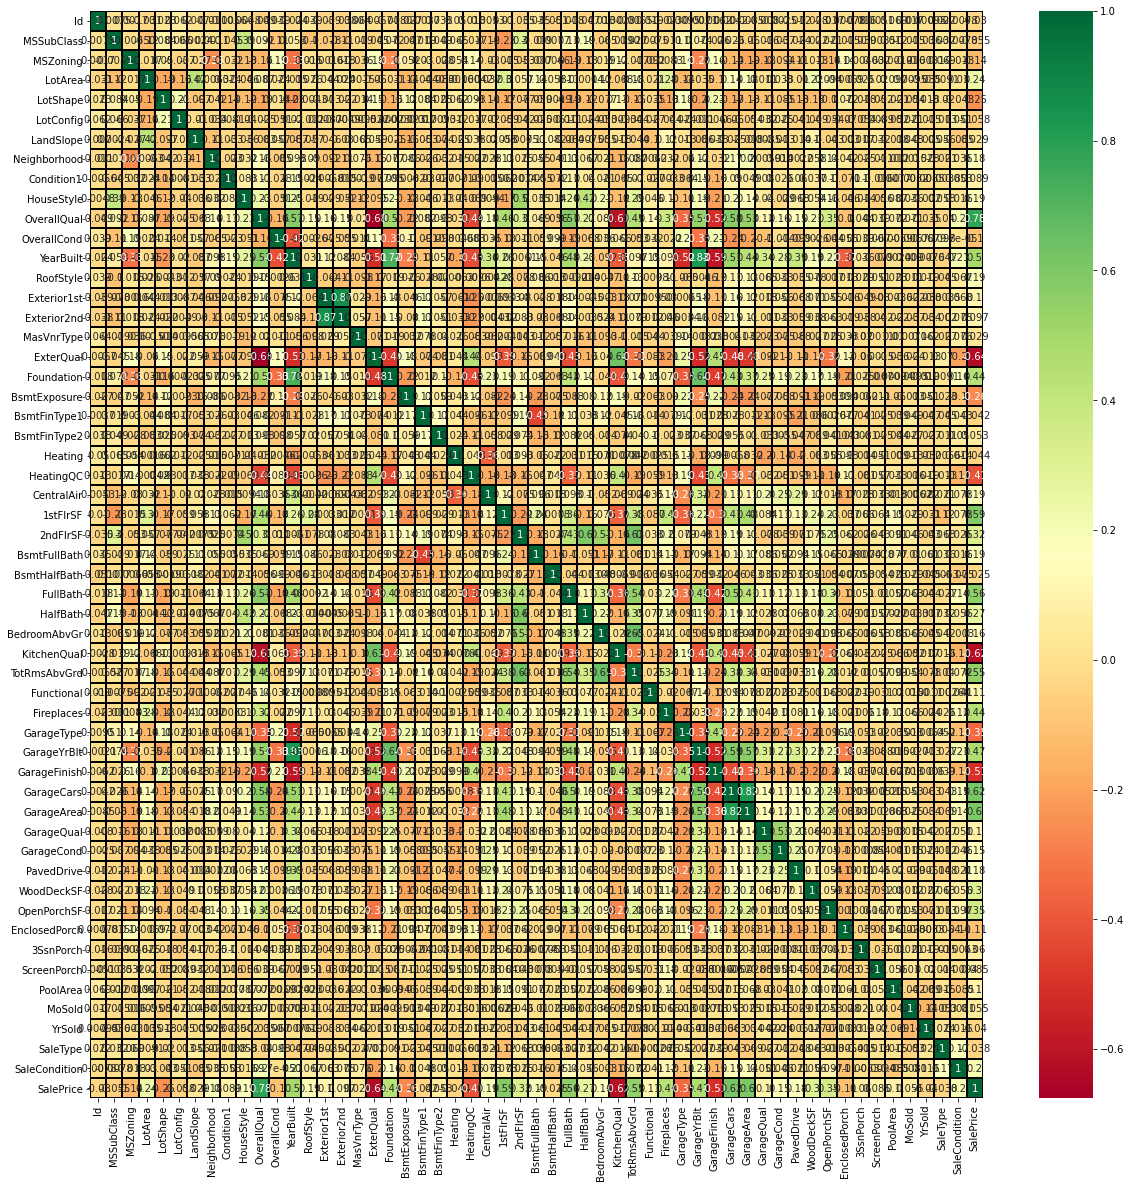

In [186]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(), annot=True, linewidth=1,linecolor='black',cmap='RdYlGn')

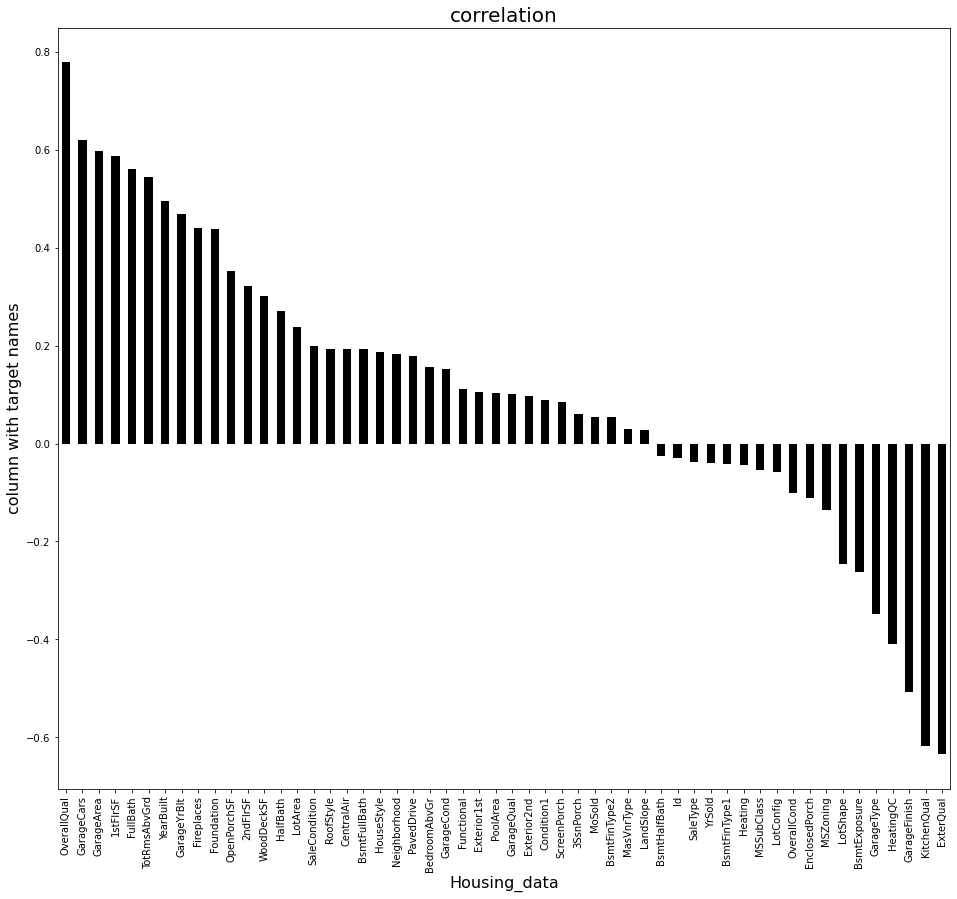

In [187]:
plt.figure(figsize=(16,14))
train_data.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='black')
plt.xlabel('Housing_data',fontsize=16)
plt.ylabel('column with target names',fontsize=16)
plt.title('correlation',fontsize=20)
plt.show()

In [202]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)
print(selection.feature_importances_)

[5.78621887e-03 6.47561777e-03 5.88922509e-03 1.48149555e-02
 3.94908187e-03 4.58046666e-03 3.42731613e-03 9.60917850e-03
 1.80370561e-03 3.12541714e-03 2.83311305e-01 6.53475073e-03
 2.94877837e-02 3.27498038e-03 4.16503623e-03 5.04494330e-03
 3.99081449e-03 6.35594005e-02 2.05054021e-03 5.02407860e-03
 4.12303767e-03 1.28432391e-03 1.68968796e-04 2.43492433e-03
 3.17094651e-03 3.68209529e-02 2.67194435e-02 1.53283146e-02
 3.85550900e-03 6.10196335e-02 6.79740982e-03 9.79632305e-03
 8.69847997e-02 1.75084477e-02 9.14870382e-04 2.29179123e-02
 8.81289474e-03 1.04737922e-02 1.72605804e-02 1.28937769e-01
 2.64064421e-02 9.34368644e-04 4.18249094e-04 8.82411084e-04
 7.23951642e-03 5.93280278e-03 2.21854132e-03 1.74583301e-03
 1.64774378e-03 1.56777588e-03 5.84794668e-03 3.33433278e-03
 4.42443270e-03 6.16393316e-03]


<function matplotlib.pyplot.show(close=None, block=None)>

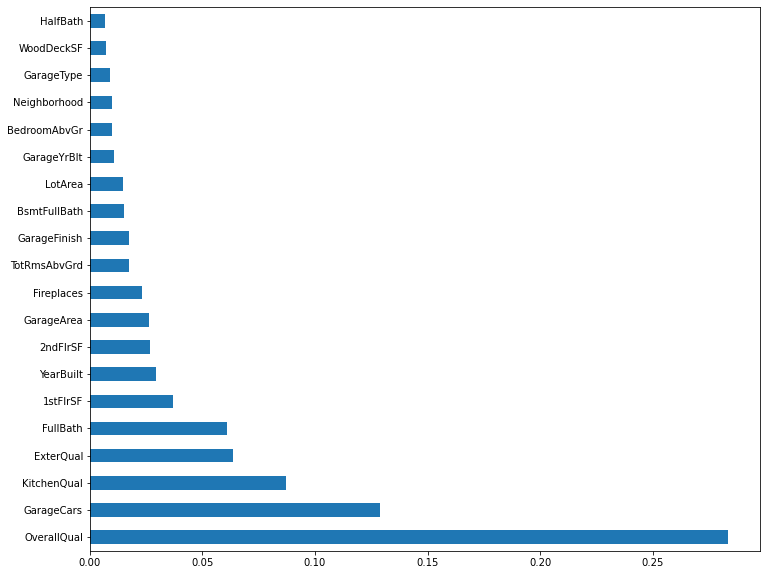

In [203]:
plt.figure(figsize=(12,10))
feat_importances=pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=670)
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
rfr.score(x_train,y_train)

0.9755451298622771

In [205]:
rfr.score(x_test,y_test)

0.7975009954440025

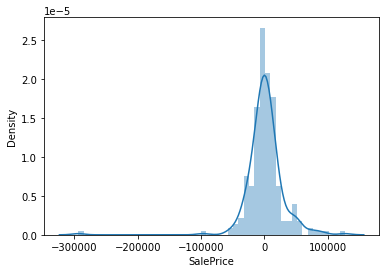

In [206]:
sns.distplot(y_test-y_pred)
plt.show()

In [207]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")


Text(0, 0.5, 'y_pred')

In [208]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 17471.182537313434
MSE: 916221359.6381993
RMSE: 30269.14864409304


In [209]:
metrics.r2_score(y_test,y_pred)

0.7975009954440025

In [210]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
rf_random=RandomizedSearchCV(estimator=rfr,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=4,cv=9,verbose= 2,random_state=65,n_jobs=1)

In [211]:
rf_random.fit(x_train,y_train)

Fitting 9 folds for each of 4 candidates, totalling 36 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600;

RandomizedSearchCV(cv=9, estimator=RandomForestRegressor(), n_iter=4, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=65, scoring='neg_mean_squared_error',
                   verbose=2)

In [212]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [213]:
predictions=rf_random.predict(x_test)
sns.distplot(y_test-predictions)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

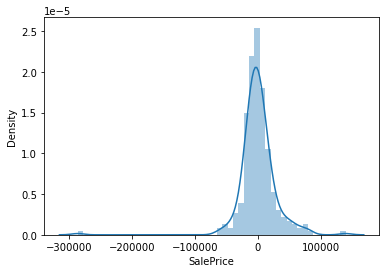

In [214]:
predictions=rf_random.predict(x_test)
sns.distplot(y_test-predictions)

Text(0, 0.5, 'predictions')

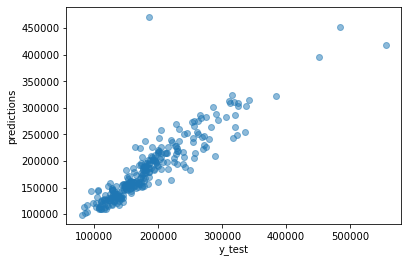

In [215]:
plt.scatter(y_test,predictions,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("predictions")


In [216]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 17372.435018656717
MSE: 871862148.4132146
RMSE: 29527.311906321826


In [217]:
#save the model
import pickle
file=open('Housing_price.pkl','wb')
pickle.dump(rf_random,file)


In [221]:
models=open('Housing_price.pkl','rb')


In [223]:
y_prediction=forest.predict(x_test)
metrics.r2_score(y_test,y_prediction)

NameError: name 'forest' is not defined